# Weather App - final project

### Data loading

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [4]:
weather=pd.read_csv('warsaw.csv')

In [5]:
weather.head(10)

STATION        NAME  LATITUDE  LONGITUDE  ELEVATION        DATE  PRCP  \
0  PLM00012375  OKECIE, PL    52.166     20.967      110.3  1993-01-01   0.0   
1  PLM00012375  OKECIE, PL    52.166     20.967      110.3  1993-01-02   NaN   
2  PLM00012375  OKECIE, PL    52.166     20.967      110.3  1993-01-03   0.0   
3  PLM00012375  OKECIE, PL    52.166     20.967      110.3  1993-01-04   0.0   
4  PLM00012375  OKECIE, PL    52.166     20.967      110.3  1993-01-05   0.0   
5  PLM00012375  OKECIE, PL    52.166     20.967      110.3  1993-01-06   NaN   
6  PLM00012375  OKECIE, PL    52.166     20.967      110.3  1993-01-07  10.9   
7  PLM00012375  OKECIE, PL    52.166     20.967      110.3  1993-01-08   NaN   
8  PLM00012375  OKECIE, PL    52.166     20.967      110.3  1993-01-09   NaN   
9  PLM00012375  OKECIE, PL    52.166     20.967      110.3  1993-01-10   2.0   

   SNWD  TAVG  TMAX  TMIN  
0  10.0  -8.3   NaN   NaN  
1  10.0 -14.9   NaN   NaN  
2  10.0 -13.6  -9.7   NaN  
3  10.0 -10.5  -6.5 -13.3  
4  10.0 -12.0  -8.9 -14.1  
5  10.0  -2.3   NaN -12.9  
6   NaN   1.5   2.0   0.9  
7   NaN   1.2   NaN   NaN  
8   NaN   0.9   NaN   NaN  
9   NaN   3.6   5.3  -0.3

In [6]:
print(weather.dtypes)

STATION       object
NAME          object
LATITUDE     float64
LONGITUDE    float64
ELEVATION    float64
DATE          object
PRCP         float64
SNWD         float64
TAVG         float64
TMAX         float64
TMIN         float64
dtype: object


In [7]:
#this line was debbuged by chat GPT
weather['DATE']=pd.to_datetime(weather['DATE']).dt.date

In [8]:
print(weather.dtypes)

STATION       object
NAME          object
LATITUDE     float64
LONGITUDE    float64
ELEVATION    float64
DATE          object
PRCP         float64
SNWD         float64
TAVG         float64
TMAX         float64
TMIN         float64
dtype: object


### Data cleaning

##### TAVG - average temperature analysis

In [9]:
print("Basic descriptions TAVG: \n", weather.TAVG.describe())
print("Number of missing values in TAVG:", weather.TAVG.isna().sum())

Basic descriptions TAVG: 
 count    10954.000000
mean         9.114241
std          8.671128
min        -22.300000
25%          2.400000
50%          9.300000
75%         16.200000
max         29.100000
Name: TAVG, dtype: float64
Number of missing values in TAVG: 0


##### PRCP - precipitation in milimeters

In [10]:
print("Basic descriptions PRCP: \n", weather.PRCP.describe())
print("Number of missing values in PRCP:", weather.PRCP.isna().sum())

Basic descriptions PRCP: 
 count    9158.000000
mean        1.790358
std         5.649012
min         0.000000
25%         0.000000
50%         0.000000
75%         1.500000
max       255.000000
Name: PRCP, dtype: float64
Number of missing values in PRCP: 1796


#### Observation - we have some missing values, to avoid the problems in building algorithms and statistics we will replace the missing value with mean value rounded to 2 decimal points

In [11]:
mean_PRCP=np.round(np.mean(weather.PRCP),2)
mean_PRCP

1.79

In [12]:
weather.PRCP=weather.PRCP.fillna(mean_PRCP)

In [13]:
print("Basic descriptions PRCP: \n", weather.PRCP.describe())
print("Number of missing values in PRCP:", weather.PRCP.isna().sum())

Basic descriptions PRCP: 
 count    10954.000000
mean         1.790299
std          5.165146
min          0.000000
25%          0.000000
50%          0.300000
75%          1.790000
max        255.000000
Name: PRCP, dtype: float64
Number of missing values in PRCP: 0


##### SNWD - snow depth analysis

In [14]:
print("Basic descriptions SNWD: \n", weather.SNWD.describe())
print("Number of missing values in SNWD:", weather.SNWD.isna().sum())

Basic descriptions SNWD: 
 count    1423.000000
mean       82.492621
std        85.352103
min        10.000000
25%        20.000000
50%        51.000000
75%       109.000000
max       531.000000
Name: SNWD, dtype: float64
Number of missing values in SNWD: 9531


#### Observation: the snow depth data is provided only for those days when the snow fall occur, or snow cover was present. That's why for the missing values we entered 0. 

In [15]:
weather.SNWD=weather.SNWD.fillna(0)

In [16]:
print("Basic descriptions SNWD: \n", weather.SNWD.describe())
print("Number of missing values in SNWD:", weather.SNWD.isna().sum())

Basic descriptions SNWD: 
 count    10954.000000
mean        10.716359
std         41.413053
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        531.000000
Name: SNWD, dtype: float64
Number of missing values in SNWD: 0


##### TMAX & TMIN - max and min temperature analysis

In [17]:
print("Basic descriptions TMAX: \n", weather.TMAX.describe())
print("Number of missing values in TMAX:", weather.TMAX.isna().sum())

Basic descriptions TMAX: 
 count    7463.000000
mean       13.919188
std         9.699870
min       -16.700000
25%         6.200000
50%        14.700000
75%        22.000000
max        37.000000
Name: TMAX, dtype: float64
Number of missing values in TMAX: 3491


In [18]:
print("Basic descriptions TMIN: \n", weather.TMIN.describe())
print("Number of missing values in TMIN:", weather.TMIN.isna().sum())

Basic descriptions TMIN: 
 count    5870.000000
mean        4.685826
std         7.780249
min       -27.100000
25%        -0.500000
50%         4.900000
75%        10.800000
max        21.800000
Name: TMIN, dtype: float64
Number of missing values in TMIN: 5084


#### OBSERVATION: for maximal and minmal temperature we can observe many missing values and we can't substitude the values by averge values. What we can do is we can calculate the average difference between max temperature and the avergage temperature and enter the calculated difference. 

In [19]:
avg_tem_max_difference=np.round(np.mean(weather.TMAX-weather.TAVG),2)
avg_tem_max_difference

4.44

In [20]:
weather.TMAX=weather.TMAX.fillna(np.round(weather.TAVG+avg_tem_max_difference,2))

In [21]:
print("Basic descriptions TMAX: \n", weather.TMAX.describe())
print("Number of missing values in TMAX:", weather.TMAX.isna().sum())

Basic descriptions TMAX: 
 count    10954.000000
mean        13.556695
std          9.487655
min        -16.700000
25%          6.040000
50%         13.900000
75%         21.400000
max         37.000000
Name: TMAX, dtype: float64
Number of missing values in TMAX: 0


In [22]:
avg_tem_min_difference=np.round(np.mean(weather.TAVG-weather.TMIN),2)
avg_tem_min_difference

4.85

In [23]:
weather.TMIN=weather.TMIN.fillna(np.round(weather.TAVG-avg_tem_min_difference,2))

In [24]:
print("Basic descriptions TMAX: \n", weather.TMAX.describe())
print("Number of missing values in TMAX:", weather.TMAX.isna().sum())

Basic descriptions TMAX: 
 count    10954.000000
mean        13.556695
std          9.487655
min        -16.700000
25%          6.040000
50%         13.900000
75%         21.400000
max         37.000000
Name: TMAX, dtype: float64
Number of missing values in TMAX: 0


In [25]:
weather.head(5)

STATION        NAME  LATITUDE  LONGITUDE  ELEVATION        DATE  PRCP  \
0  PLM00012375  OKECIE, PL    52.166     20.967      110.3  1993-01-01  0.00   
1  PLM00012375  OKECIE, PL    52.166     20.967      110.3  1993-01-02  1.79   
2  PLM00012375  OKECIE, PL    52.166     20.967      110.3  1993-01-03  0.00   
3  PLM00012375  OKECIE, PL    52.166     20.967      110.3  1993-01-04  0.00   
4  PLM00012375  OKECIE, PL    52.166     20.967      110.3  1993-01-05  0.00   

   SNWD  TAVG   TMAX   TMIN  
0  10.0  -8.3  -3.86 -13.15  
1  10.0 -14.9 -10.46 -19.75  
2  10.0 -13.6  -9.70 -18.45  
3  10.0 -10.5  -6.50 -13.30  
4  10.0 -12.0  -8.90 -14.10

### SUMMARY: Database is now cleared from missing values, variables are proper type and we can move to sql integration database

### Creating SQL database and connection

In [26]:
#create database
import sqlite3

conn = sqlite3.connect('weatherdata.db')

conn.close()

### Uploading dataset from kaggle to database

In [27]:
#creating connection to database
conn = sqlite3.connect('weatherdata.db')

#uploading database
weather.to_sql('weather', conn, if_exists='replace')

#closing connection
conn.close()


##### Checking if the uploading worked

In [28]:
conn = sqlite3.connect('weatherdata.db')

c = conn.cursor()

#selecting every table from dataset
c.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = c.fetchall()
for tableName in tables:
    print(tableName)

# We do not have to commit anything as we didn't make any changes.
conn.close()

('weather',)


### Substracting monthly data form weather table

In [29]:
conn = sqlite3.connect('weatherdata.db')
c = conn.cursor()

months_names=("january","february","march", "april","may","june","july","august","september","october","november","december")
for i in range(1,13):
    table_name = f"{months_names[i-1]}_weather"
    month_number = f"{i:02d}"
    c.execute(f"""CREATE TABLE "{table_name}" AS SELECT * FROM weather WHERE strftime('%m', DATE) = '{month_number}';""")

conn.commit()
conn.close()

In [30]:
conn = sqlite3.connect('weatherdata.db')

c = conn.cursor()

#selecting every table from dataset
c.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = c.fetchall()
for tableName in tables:
    print(tableName)

# We do not have to commit anything as we didn't make any changes.
conn.close()

('weather',)
('january_weather',)
('february_weather',)
('march_weather',)
('april_weather',)
('may_weather',)
('june_weather',)
('july_weather',)
('august_weather',)
('september_weather',)
('october_weather',)
('november_weather',)
('december_weather',)


### Substracting the yearly data

In [31]:
conn = sqlite3.connect('weatherdata.db')
c = conn.cursor()

for i in range(1993,2023):
    table_name = f"{i}_weather"
    c.execute(f"""CREATE TABLE "{table_name}" AS SELECT * FROM weather WHERE strftime('%Y', DATE) = '{i}';""")

conn.commit()
conn.close()

In [32]:
conn = sqlite3.connect('weatherdata.db')

c = conn.cursor()

#selecting every table from dataset
c.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = c.fetchall()
for tableName in tables:
    print(tableName)

# We do not have to commit anything as we didn't make any changes.
conn.close()

('weather',)
('january_weather',)
('february_weather',)
('march_weather',)
('april_weather',)
('may_weather',)
('june_weather',)
('july_weather',)
('august_weather',)
('september_weather',)
('october_weather',)
('november_weather',)
('december_weather',)
('1993_weather',)
('1994_weather',)
('1995_weather',)
('1996_weather',)
('1997_weather',)
('1998_weather',)
('1999_weather',)
('2000_weather',)
('2001_weather',)
('2002_weather',)
('2003_weather',)
('2004_weather',)
('2005_weather',)
('2006_weather',)
('2007_weather',)
('2008_weather',)
('2009_weather',)
('2010_weather',)
('2011_weather',)
('2012_weather',)
('2013_weather',)
('2014_weather',)
('2015_weather',)
('2016_weather',)
('2017_weather',)
('2018_weather',)
('2019_weather',)
('2020_weather',)
('2021_weather',)
('2022_weather',)


In [33]:
# Connect to the SQLite database
conn = sqlite3.connect('weatherdata.db')
c = conn.cursor()

# Table name for February weather
table_name = '1993_weather'

# Inspect the first 5 rows of data from the table
c.execute(f"SELECT * FROM '{table_name}' lIMIT 300;")
rows = c.fetchall()
print(f"Sample data from '{table_name}':")
for row in rows:
    print(row)

# Close the connection
conn.close()

Sample data from '1993_weather':
(0, 'PLM00012375', 'OKECIE, PL', 52.166, 20.967, 110.3, '1993-01-01', 0.0, 10.0, -8.3, -3.86, -13.15)
(1, 'PLM00012375', 'OKECIE, PL', 52.166, 20.967, 110.3, '1993-01-02', 1.79, 10.0, -14.9, -10.46, -19.75)
(2, 'PLM00012375', 'OKECIE, PL', 52.166, 20.967, 110.3, '1993-01-03', 0.0, 10.0, -13.6, -9.7, -18.45)
(3, 'PLM00012375', 'OKECIE, PL', 52.166, 20.967, 110.3, '1993-01-04', 0.0, 10.0, -10.5, -6.5, -13.3)
(4, 'PLM00012375', 'OKECIE, PL', 52.166, 20.967, 110.3, '1993-01-05', 0.0, 10.0, -12.0, -8.9, -14.1)
(5, 'PLM00012375', 'OKECIE, PL', 52.166, 20.967, 110.3, '1993-01-06', 1.79, 10.0, -2.3, 2.14, -12.9)
(6, 'PLM00012375', 'OKECIE, PL', 52.166, 20.967, 110.3, '1993-01-07', 10.9, 0.0, 1.5, 2.0, 0.9)
(7, 'PLM00012375', 'OKECIE, PL', 52.166, 20.967, 110.3, '1993-01-08', 1.79, 0.0, 1.2, 5.64, -3.65)
(8, 'PLM00012375', 'OKECIE, PL', 52.166, 20.967, 110.3, '1993-01-09', 1.79, 0.0, 0.9, 5.34, -3.95)
(9, 'PLM00012375', 'OKECIE, PL', 52.166, 20.967, 110.3, '1993

### Substracting days with the snow fall/cover

In [34]:
conn = sqlite3.connect('weatherdata.db')
c = conn.cursor()

c.execute("CREATE TABLE snowy_days AS SELECT * FROM weather WHERE SNWD > 0 ;")

conn.commit()
conn.close()

### Substracting days with below zero average temperature

In [35]:
conn = sqlite3.connect('weatherdata.db')
c = conn.cursor()

c.execute("CREATE TABLE frosty_days AS SELECT * FROM weather WHERE TAVG < 0 ;")

conn.commit()
conn.close()

## Data visualisation

In [36]:
import matplotlib.pyplot as plt

In [37]:
conn = sqlite3.connect('weatherdata.db')
c = conn.cursor()

months_names=('january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december')

#we create a loop in order to get seperate data frames for each month

for month in months_names:
    data = f'SELECT DATE, PRCP, SNWD, TAVG, TMAX, TMIN FROM {month}_weather'
    #the line of code below was developed with the help of chat GPT
    globals()[f"{month}_data"] = pd.read_sql_query(data, conn)

conn.close()

print(january_data.head())

         DATE  PRCP  SNWD  TAVG   TMAX   TMIN
0  1993-01-01  0.00  10.0  -8.3  -3.86 -13.15
1  1993-01-02  1.79  10.0 -14.9 -10.46 -19.75
2  1993-01-03  0.00  10.0 -13.6  -9.70 -18.45
3  1993-01-04  0.00  10.0 -10.5  -6.50 -13.30
4  1993-01-05  0.00  10.0 -12.0  -8.90 -14.10


#### we want to create two new columns:
MAVG - monthly average temperature for each month of each year, eg. average temperature in january 1993

DAVG - daily average temperature for each day of the year troughout the years, eg. average temperature on january 1st

In [38]:
for month in months_names:
    month_data = globals()[f'{month}_data']
    month_data['DATE'] = pd.to_datetime(month_data['DATE'])
    month_data['YEAR'] = month_data['DATE'].dt.year
    month_data['MONTH'] = month_data['DATE'].dt.month
    month_data['MAVG'] = month_data.groupby(['YEAR', 'MONTH'])['TAVG'].transform('mean').round(2)
    month_data['M_D'] = month_data['DATE'].dt.strftime('%m-%d')
    month_data['DAVG'] = month_data.groupby('M_D')['TAVG'].transform('mean').round(2)
    month_data['AVG_PRCP'] = month_data.groupby('M_D')['PRCP'].transform('mean').round(2)

print(january_data.head(40))

         DATE   PRCP  SNWD  TAVG   TMAX   TMIN  YEAR  MONTH  MAVG    M_D  \
0  1993-01-01   0.00  10.0  -8.3  -3.86 -13.15  1993      1  0.16  01-01   
1  1993-01-02   1.79  10.0 -14.9 -10.46 -19.75  1993      1  0.16  01-02   
2  1993-01-03   0.00  10.0 -13.6  -9.70 -18.45  1993      1  0.16  01-03   
3  1993-01-04   0.00  10.0 -10.5  -6.50 -13.30  1993      1  0.16  01-04   
4  1993-01-05   0.00  10.0 -12.0  -8.90 -14.10  1993      1  0.16  01-05   
5  1993-01-06   1.79  10.0  -2.3   2.14 -12.90  1993      1  0.16  01-06   
6  1993-01-07  10.90   0.0   1.5   2.00   0.90  1993      1  0.16  01-07   
7  1993-01-08   1.79   0.0   1.2   5.64  -3.65  1993      1  0.16  01-08   
8  1993-01-09   1.79   0.0   0.9   5.34  -3.95  1993      1  0.16  01-09   
9  1993-01-10   2.00   0.0   3.6   5.30  -0.30  1993      1  0.16  01-10   
10 1993-01-11   0.50   0.0   7.4  11.84   3.80  1993      1  0.16  01-11   
11 1993-01-12   3.00   0.0   6.4  13.80   1.55  1993      1  0.16  01-12   
12 1993-01-1

### Visualisation - temparature trends for each year

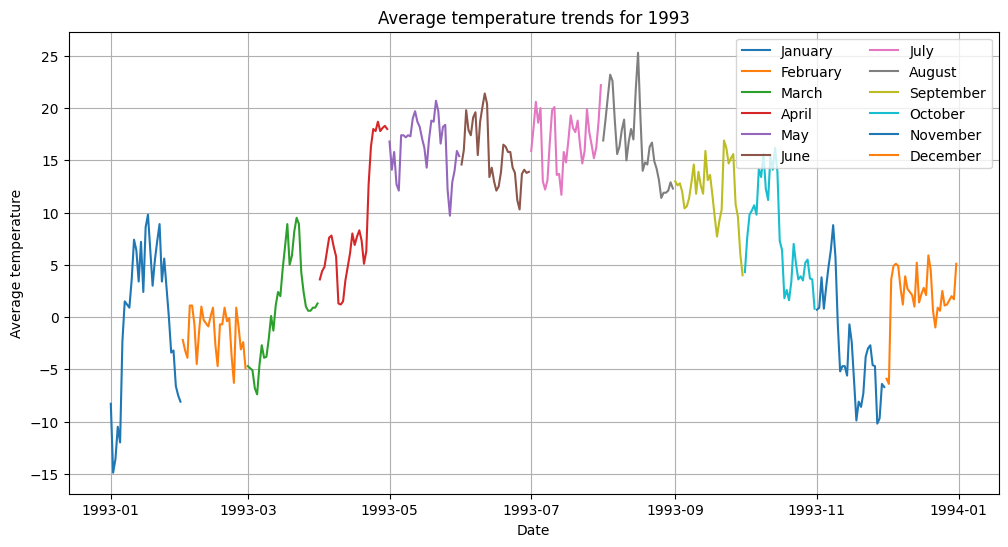

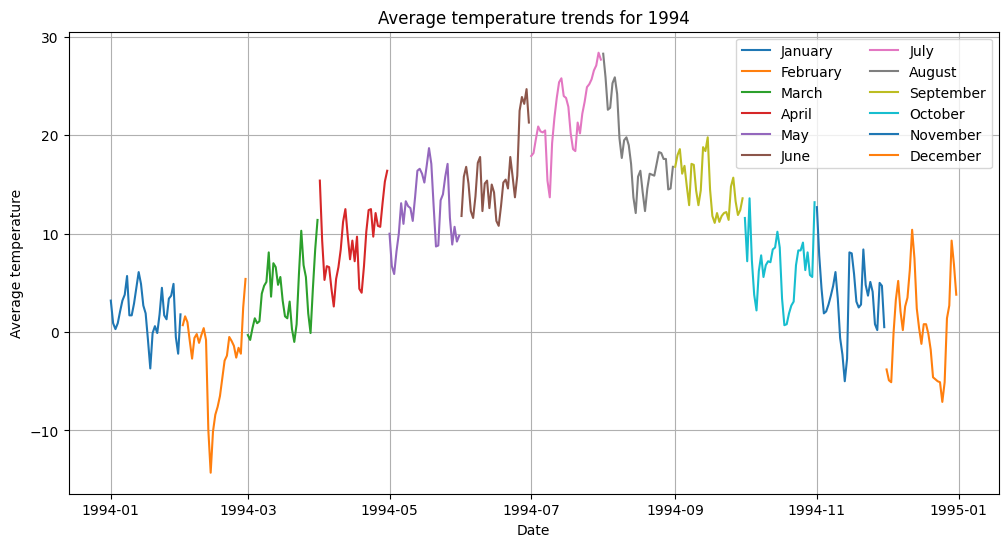

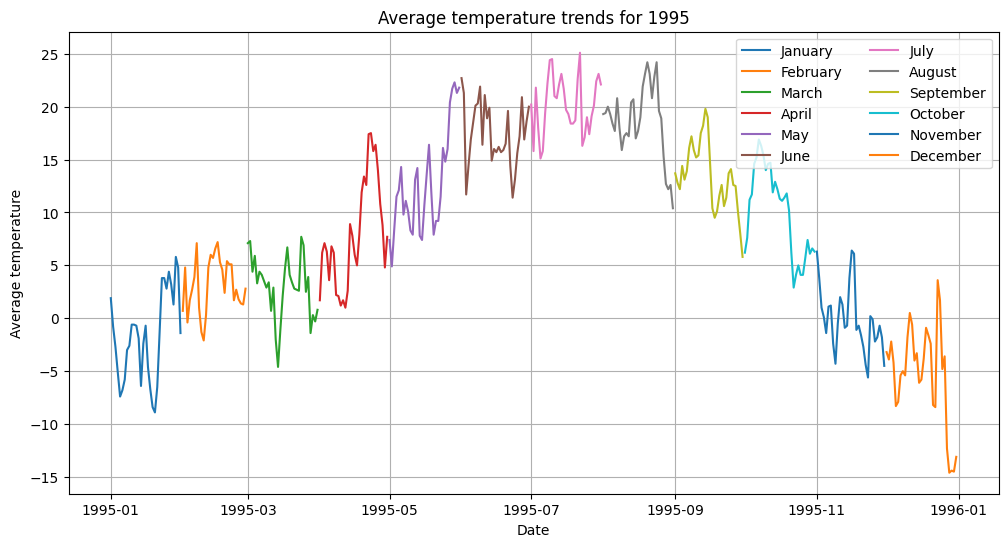

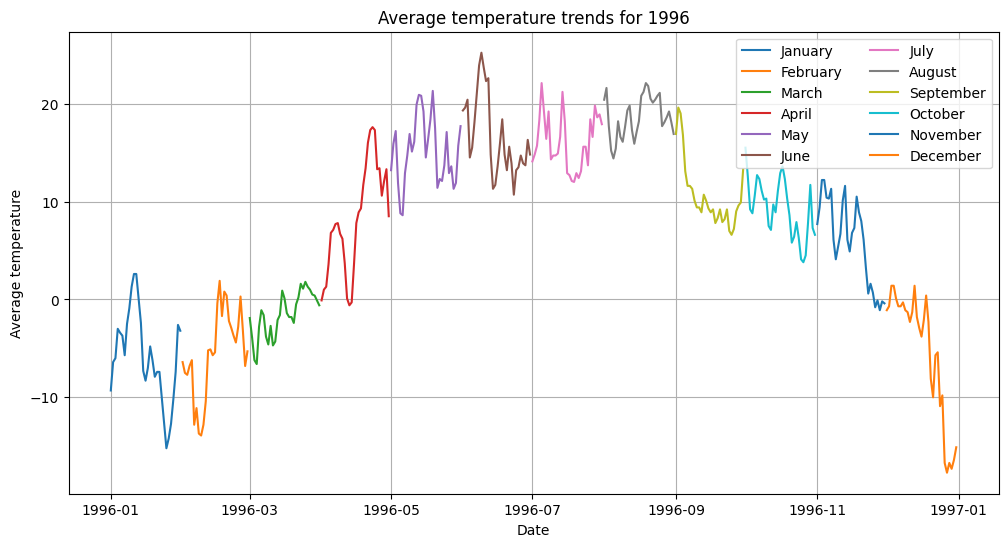

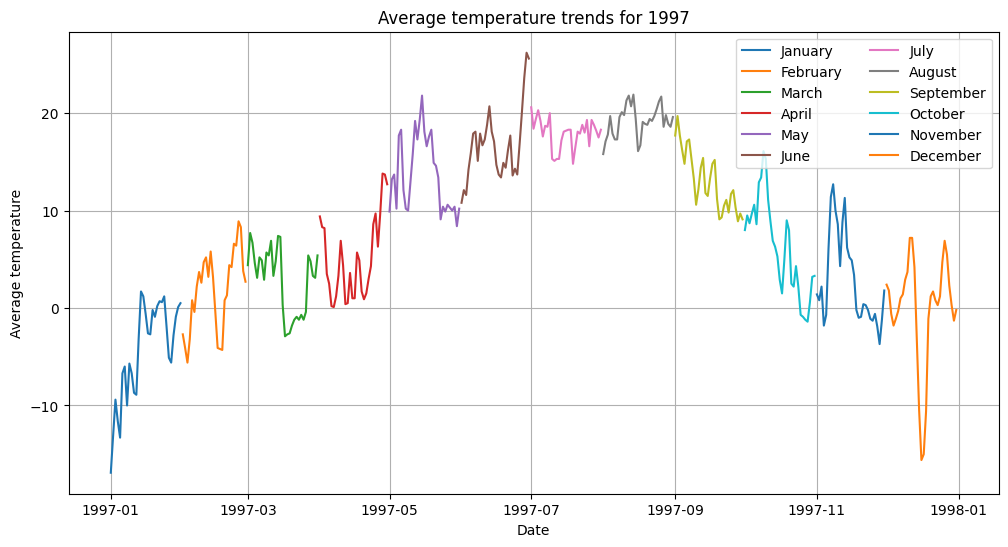

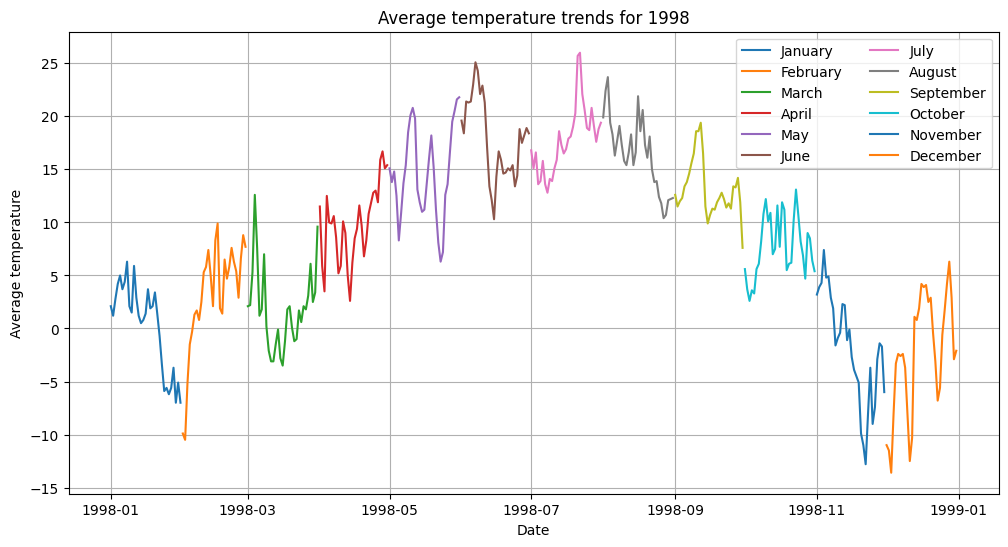

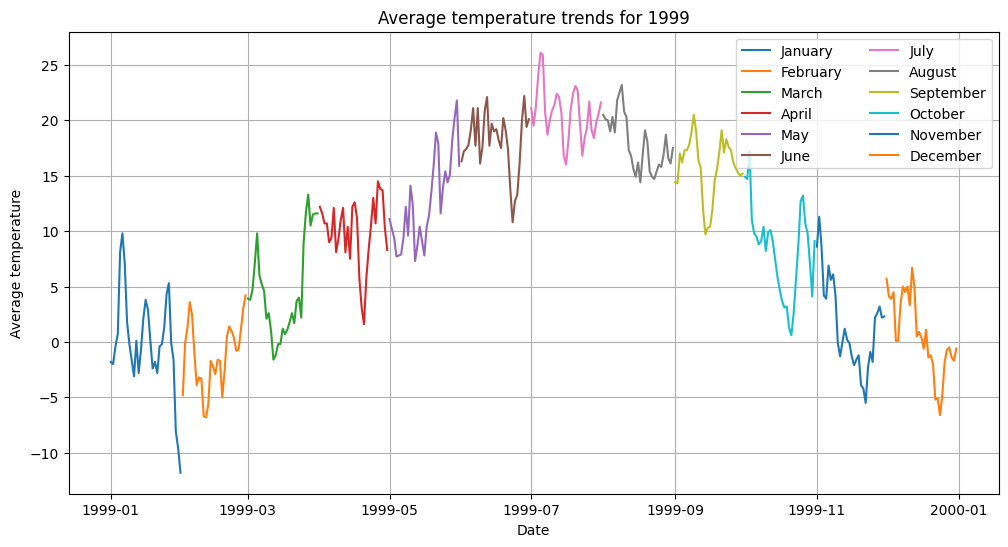

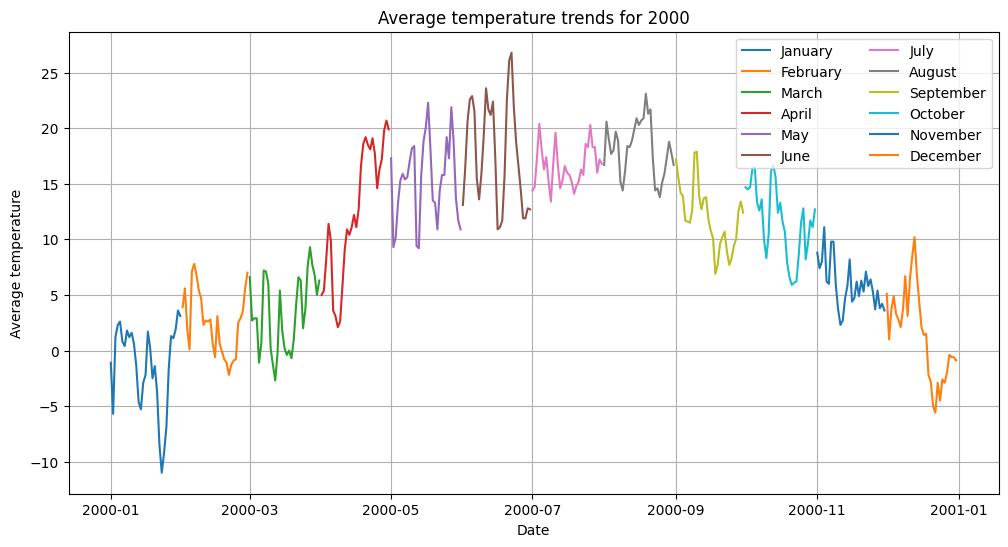

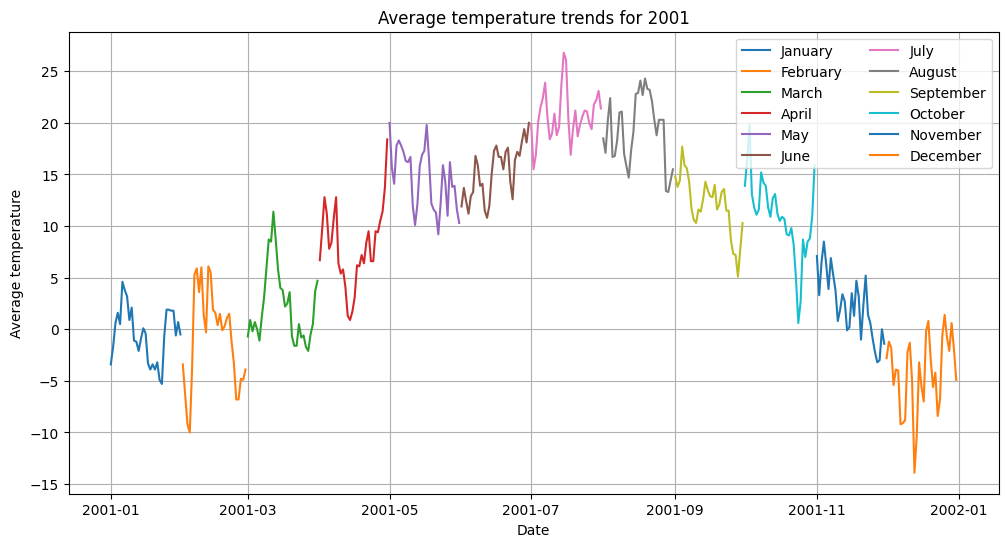

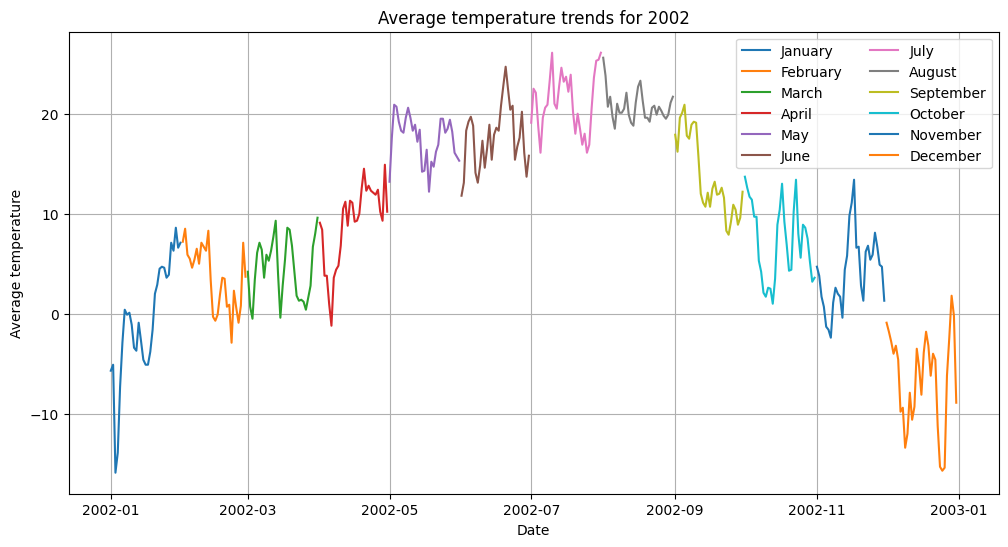

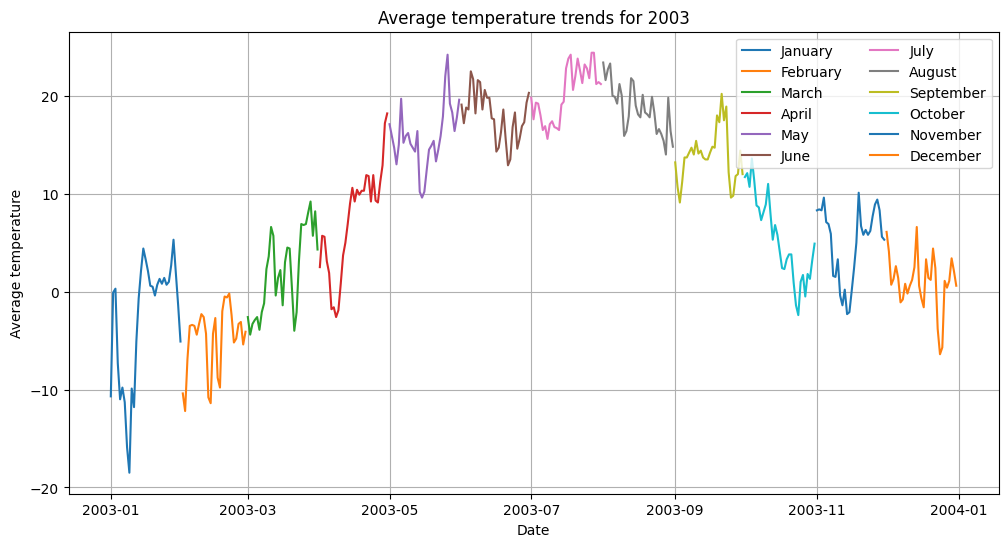

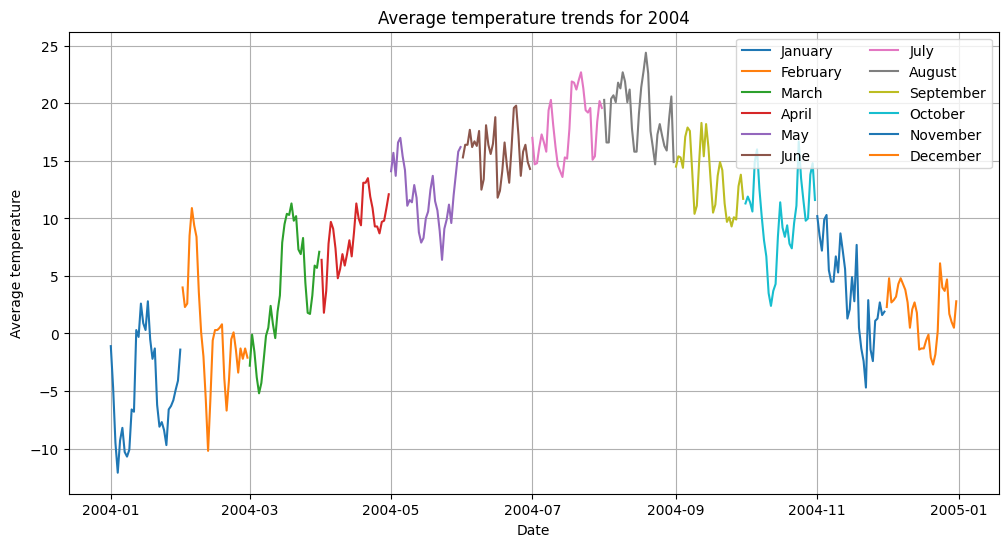

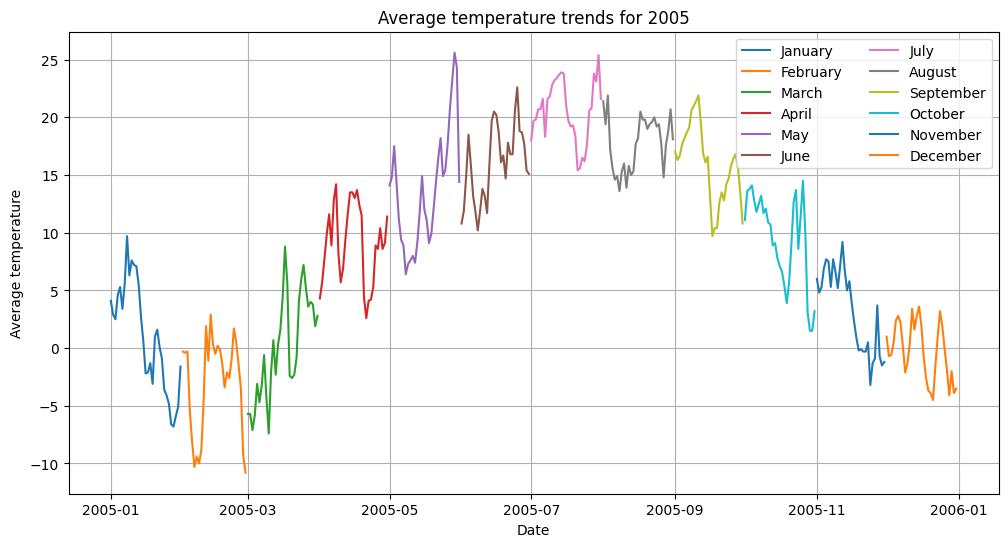

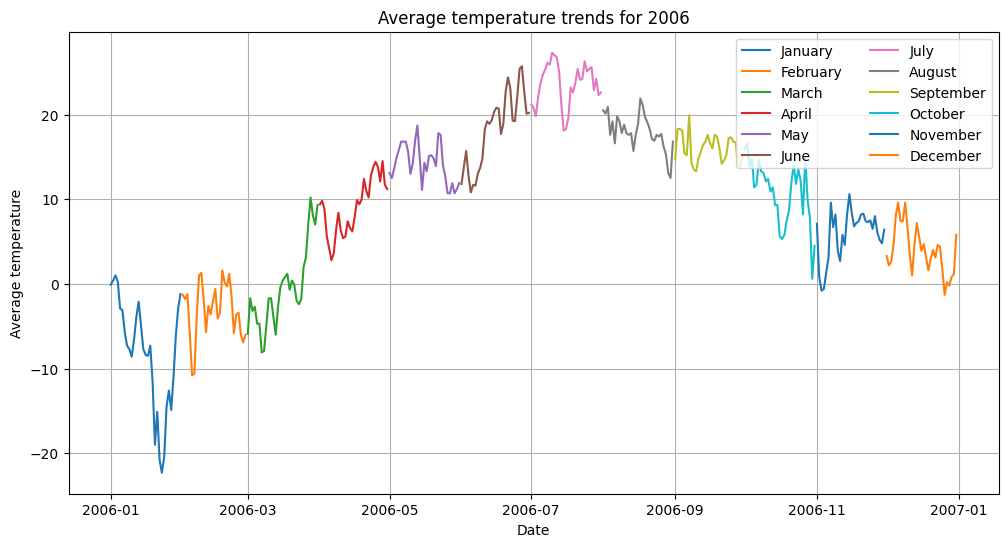

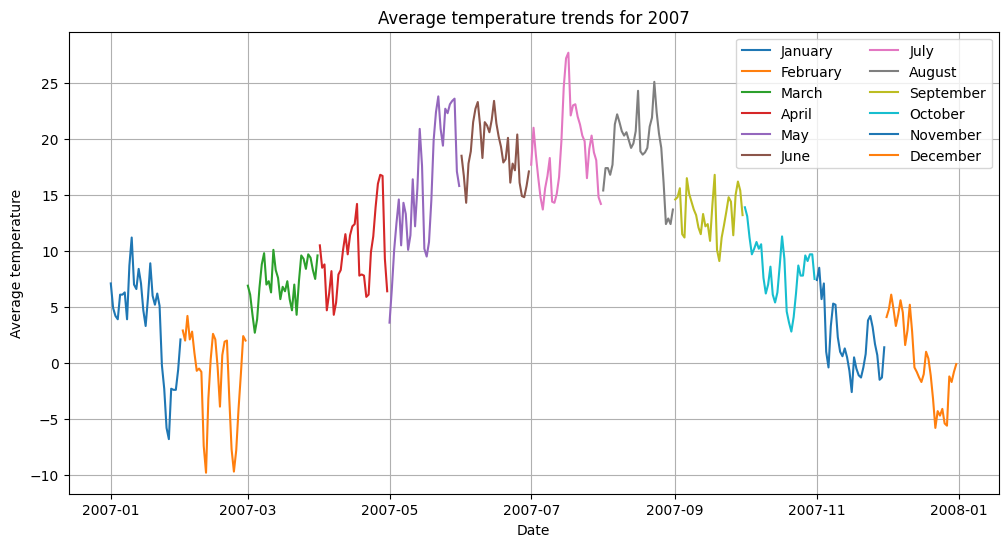

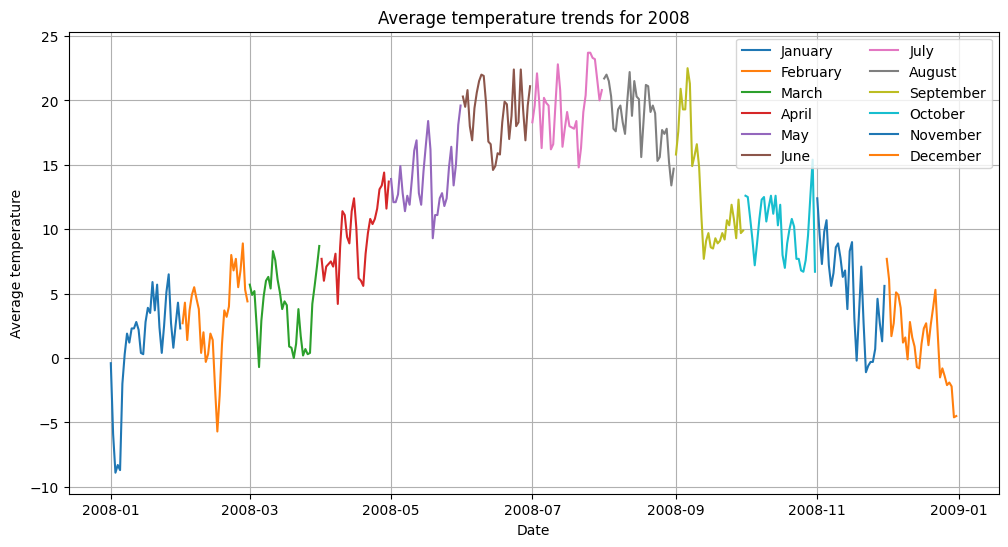

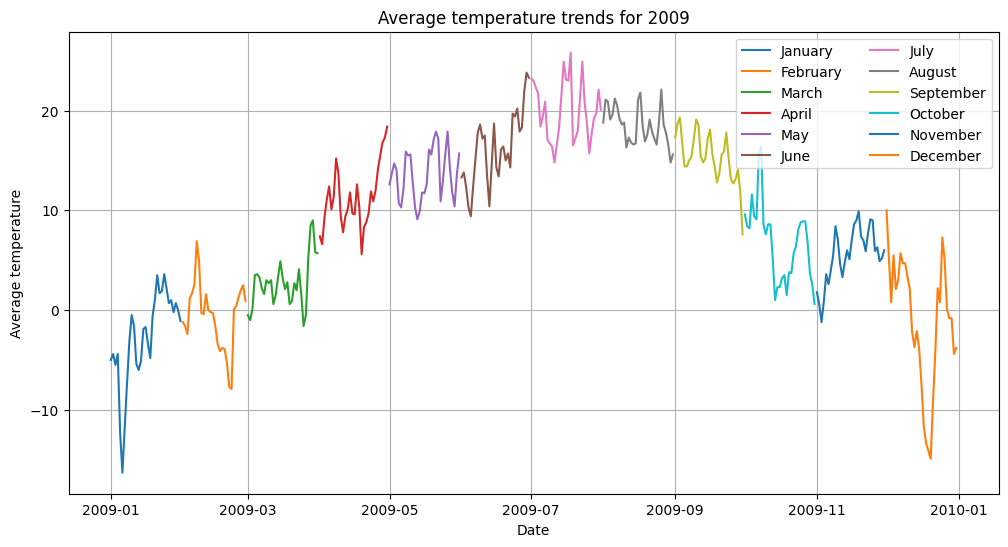

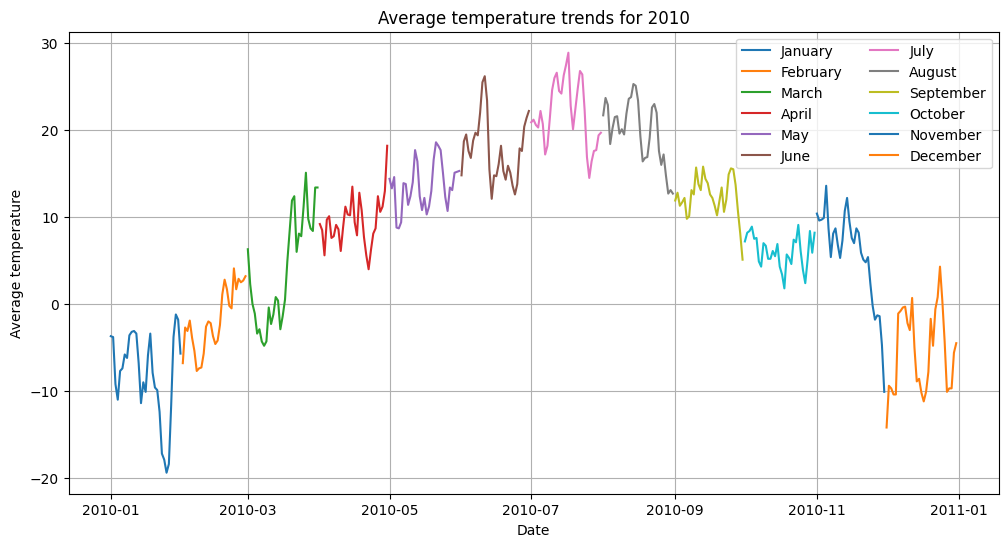

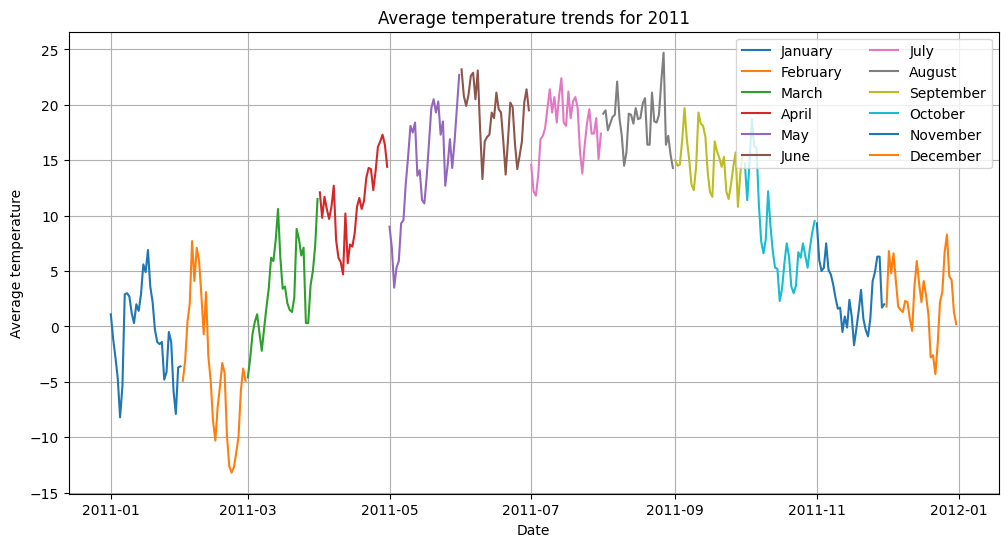

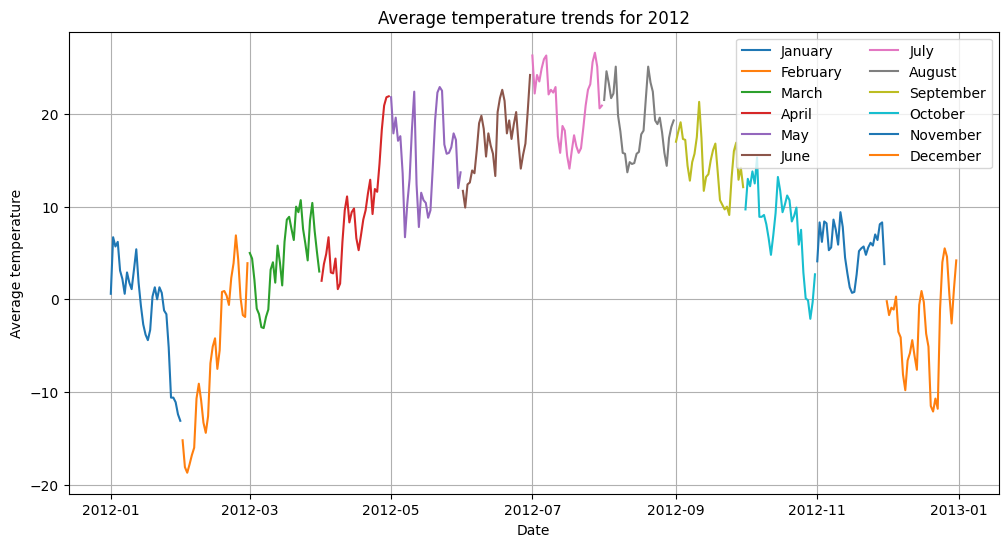

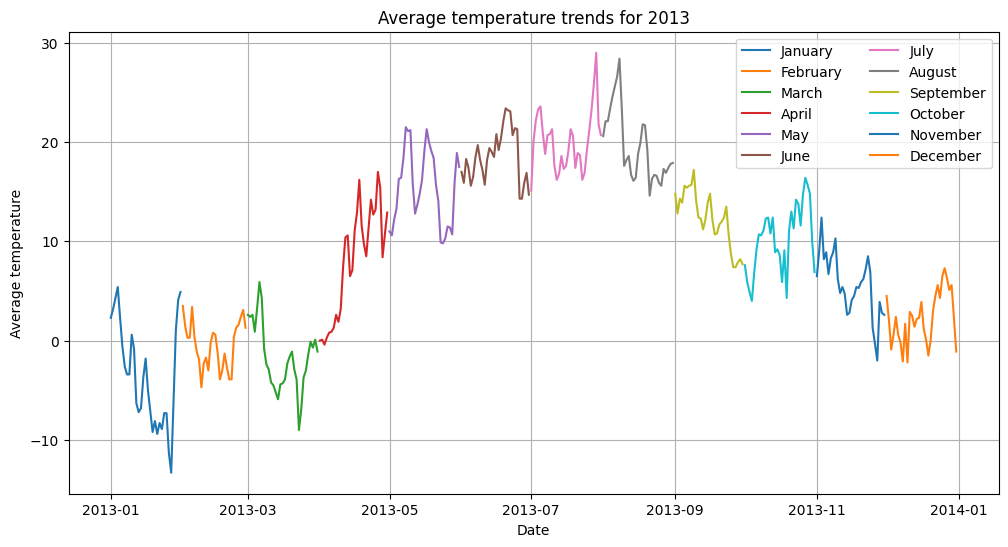

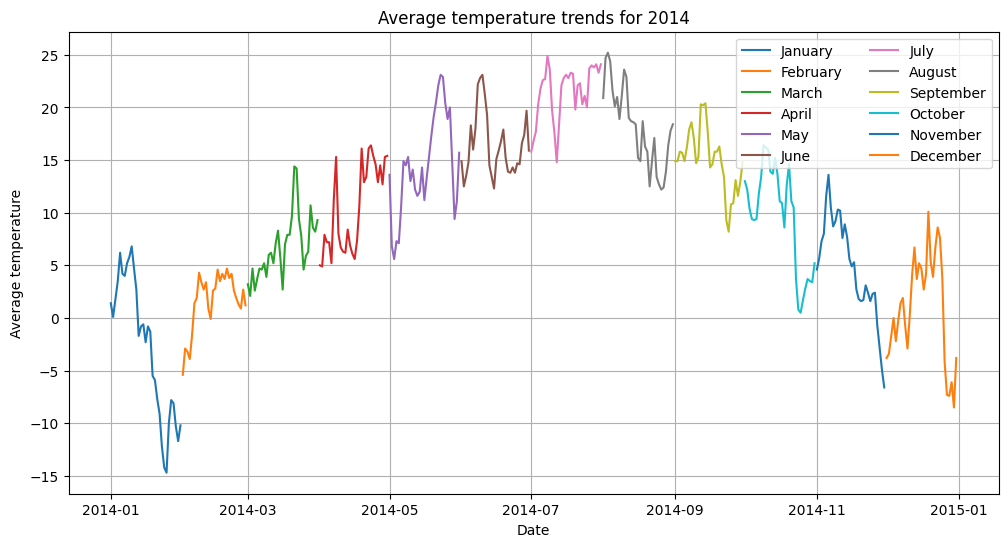

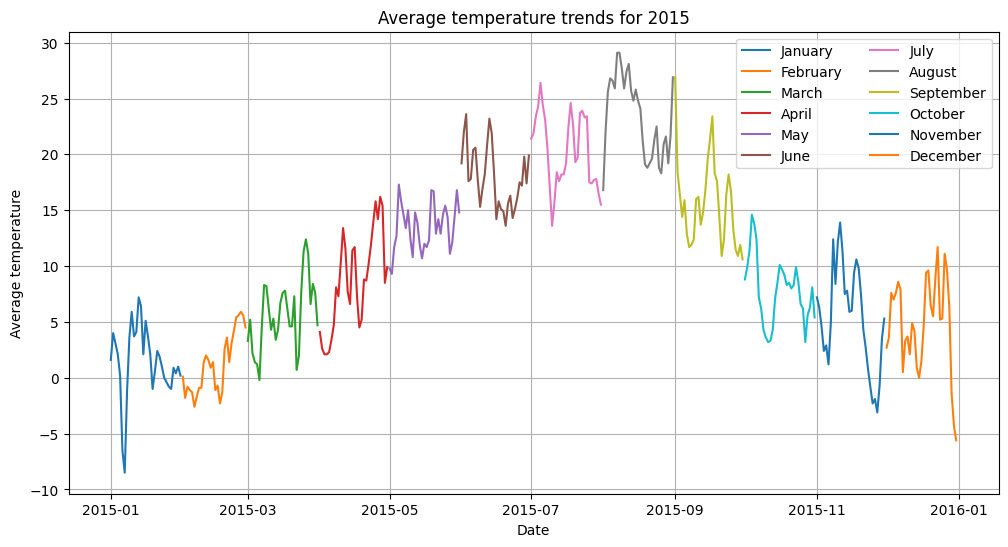

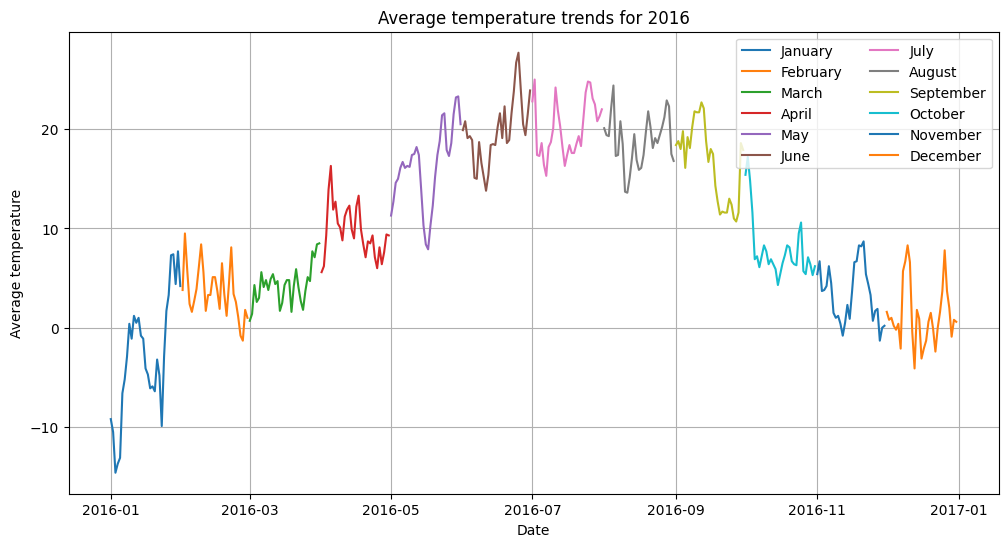

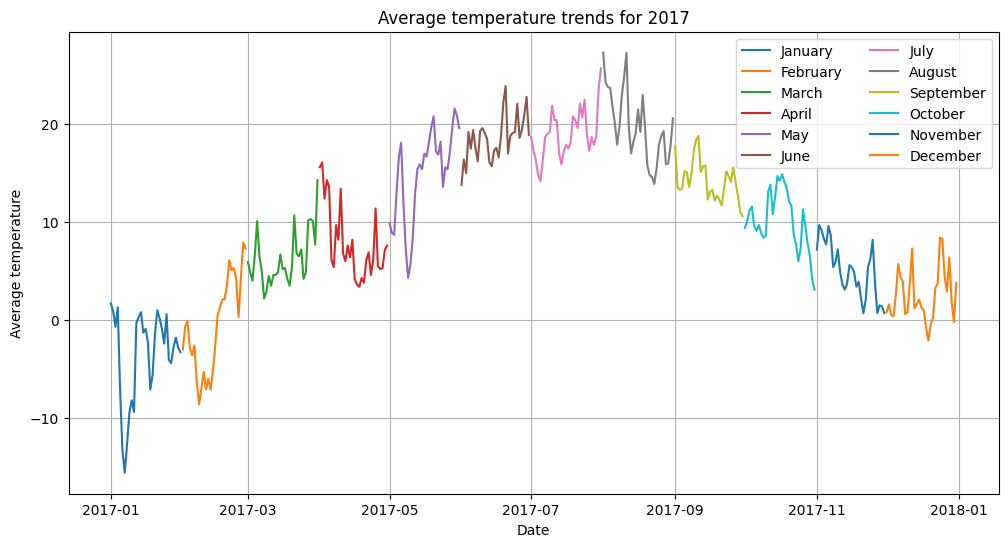

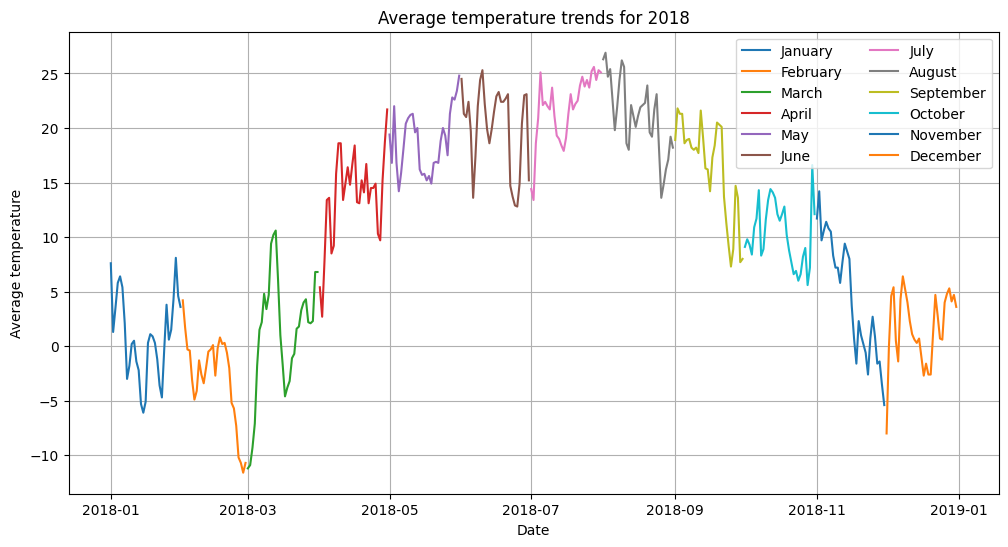

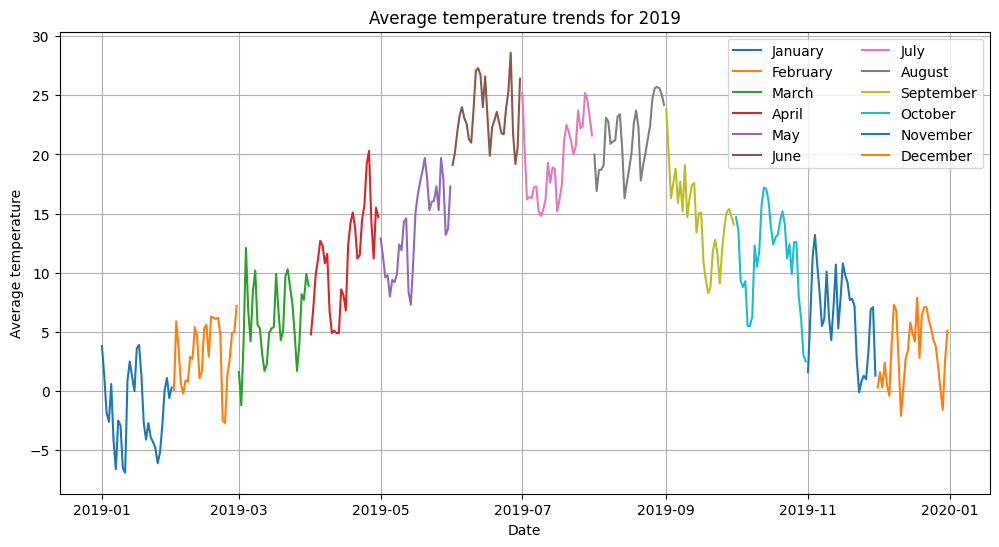

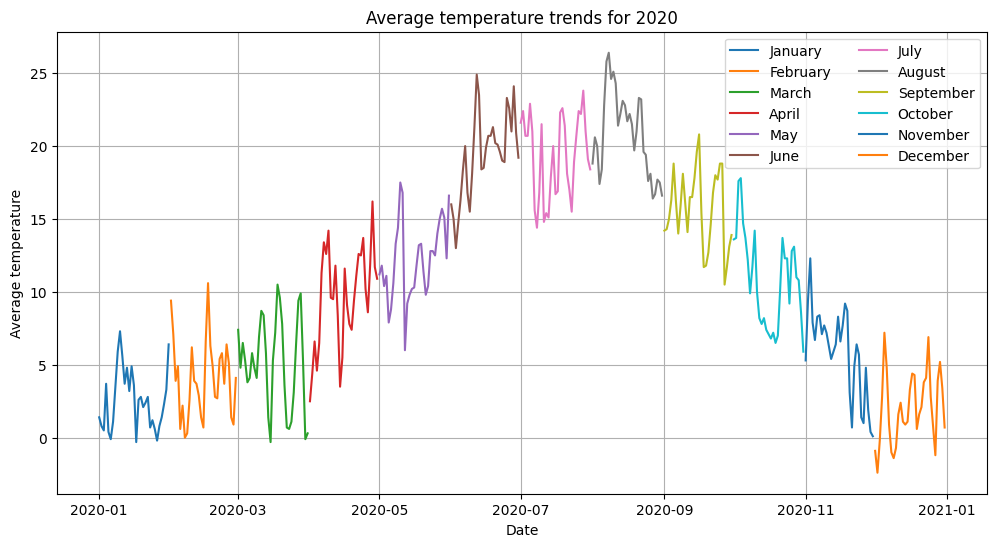

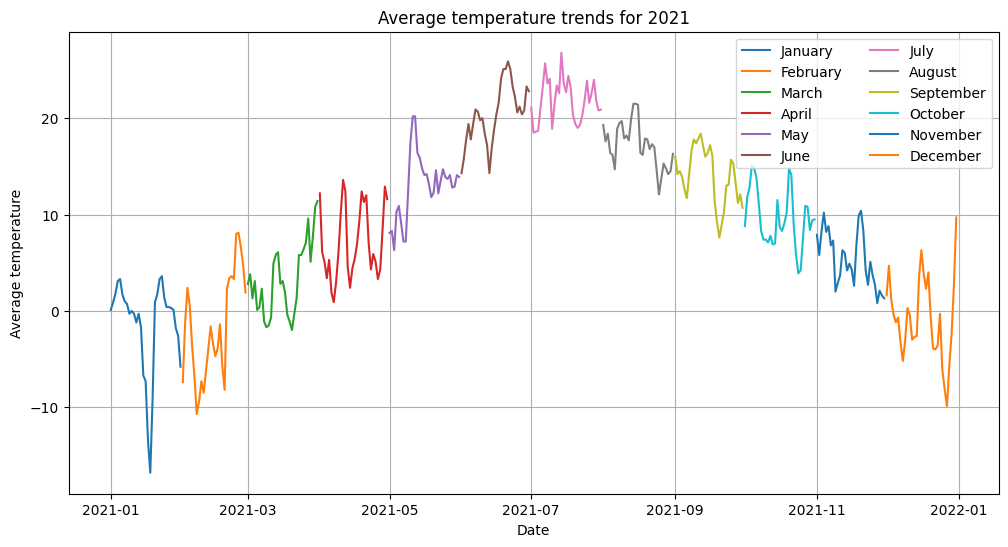

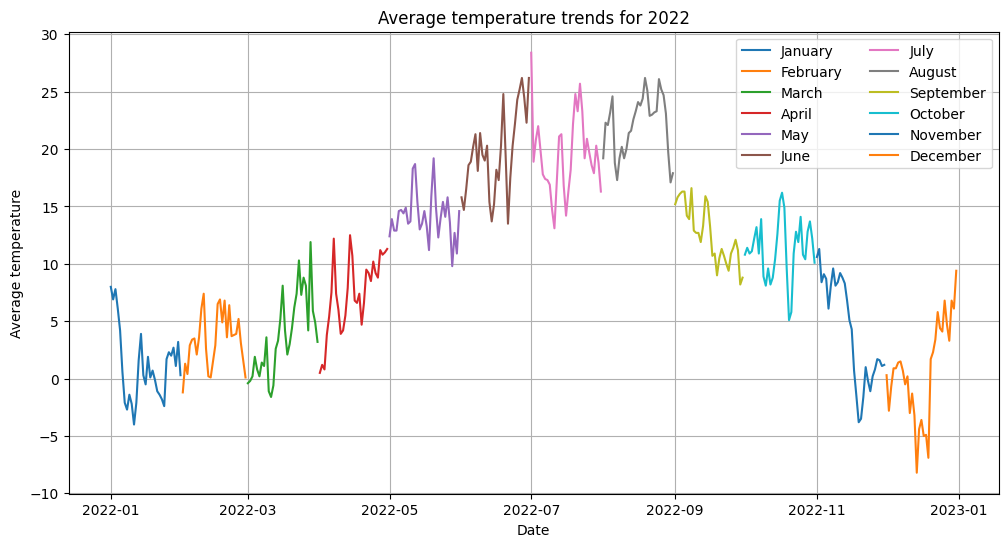

In [39]:
years = range(1993, 2023)

for year in years:
    plt.figure(figsize=(12,6))
    
    for month in months_names:
        month_data = globals()[f'{month}_data']
        month_year_data = month_data[month_data['YEAR'] == year]
        plt.plot(month_year_data['DATE'], month_year_data['TAVG'], label=month.capitalize())
        
    plt.title(f'Average temperature trends for {year}')
    plt.xlabel('Date')
    plt.ylabel('Average temperature')
    plt.legend(loc='upper right', ncol=2)
    plt.grid(True)
    plt.show()


### Visualisation - average temperature for each month
Since 'DAVG' variable is the same for every year we can just use the year 1993 as an example

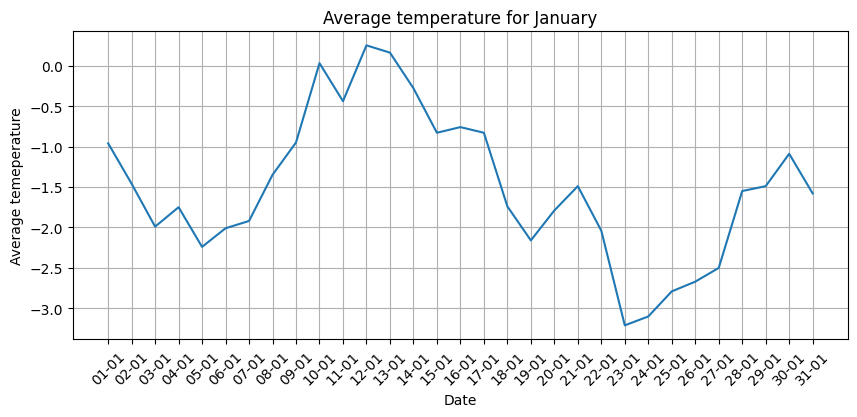

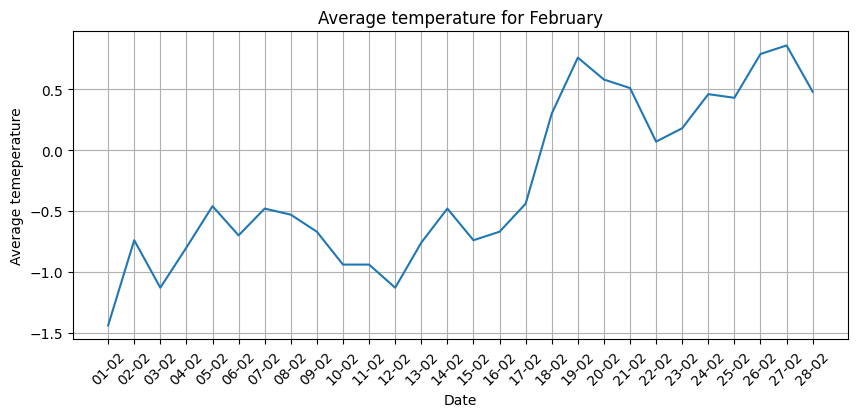

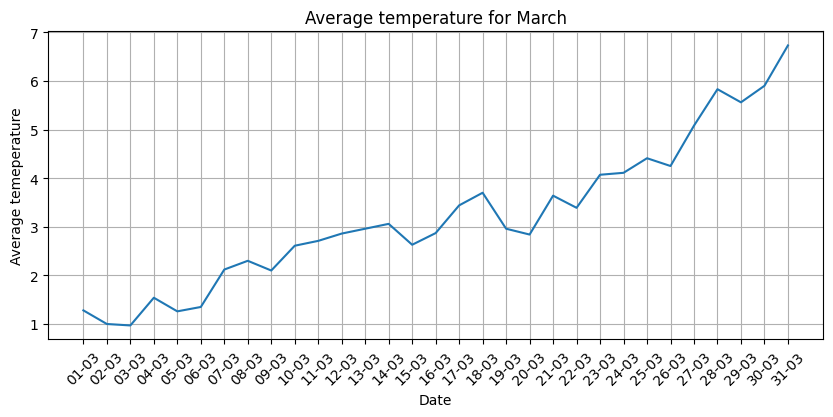

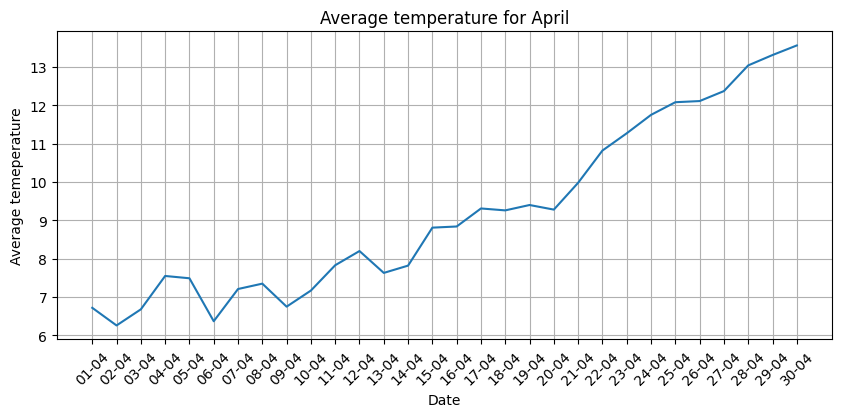

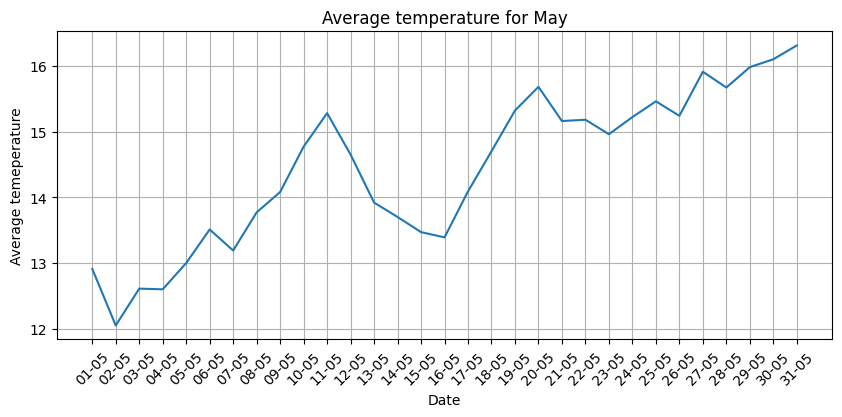

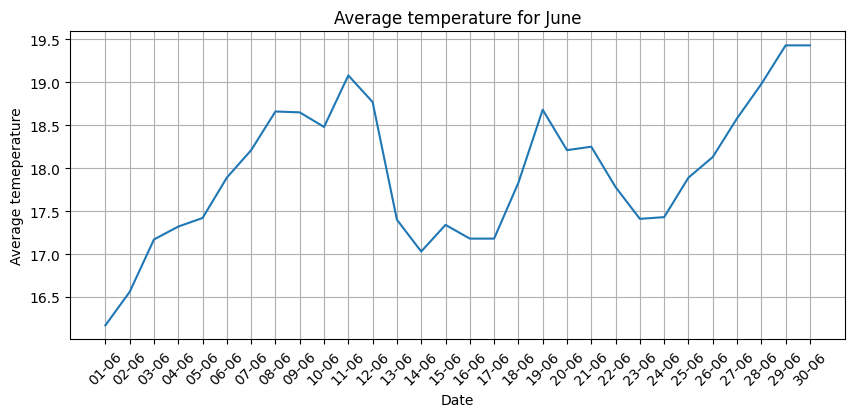

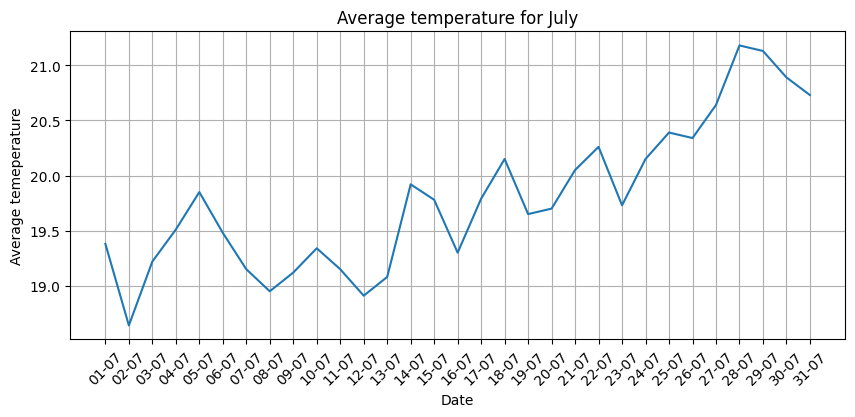

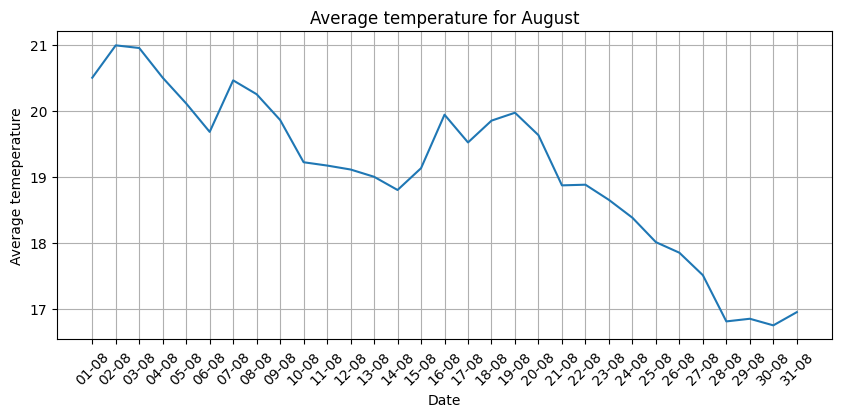

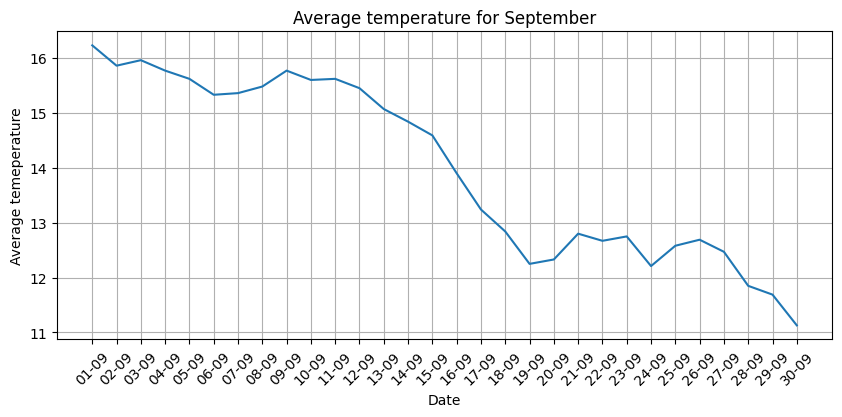

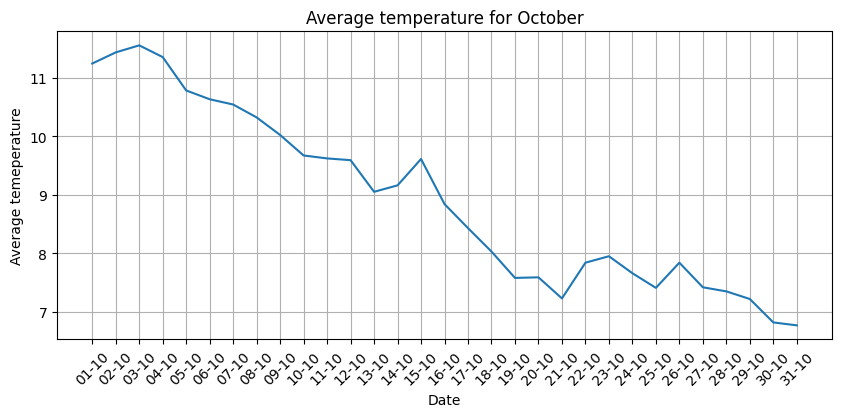

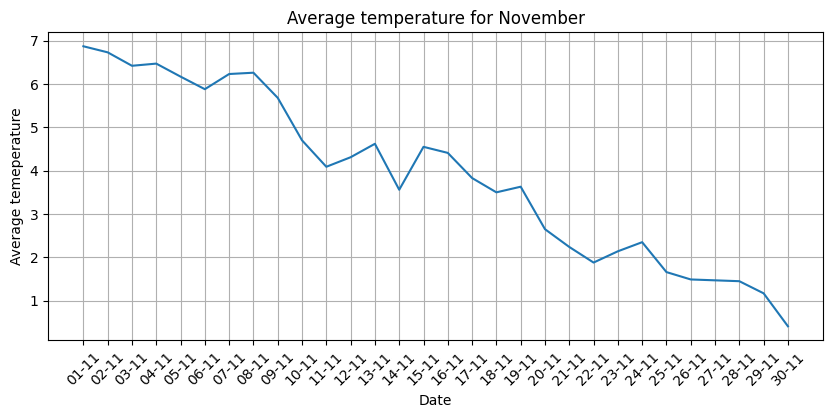

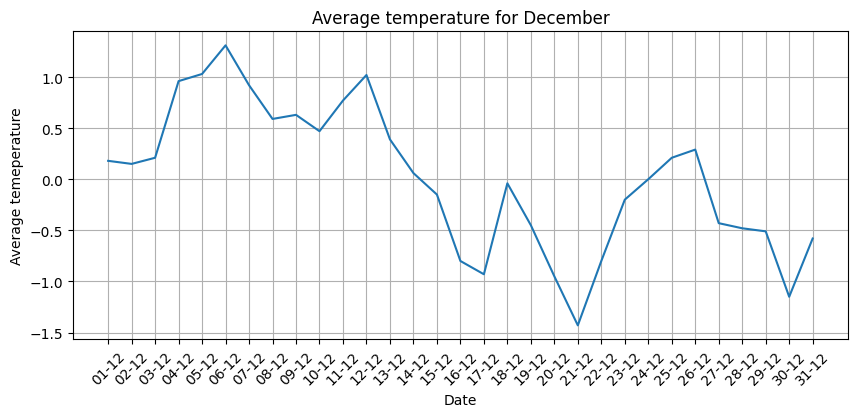

In [40]:
for month in months_names:
    plt.figure(figsize=(10,4))
    month_data = globals()[f'{month}_data']
    month_1993 = month_data[month_data['YEAR'] == 1993]
    
    plt.plot(month_1993['DATE'].dt.strftime('%d-%m'), month_1993['DAVG'])
    plt.title(f'Average temperature for {month.capitalize()}')
    plt.xlabel('Date')
    plt.ylabel('Average temeperature')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

### Visualisation - precipitation in different years

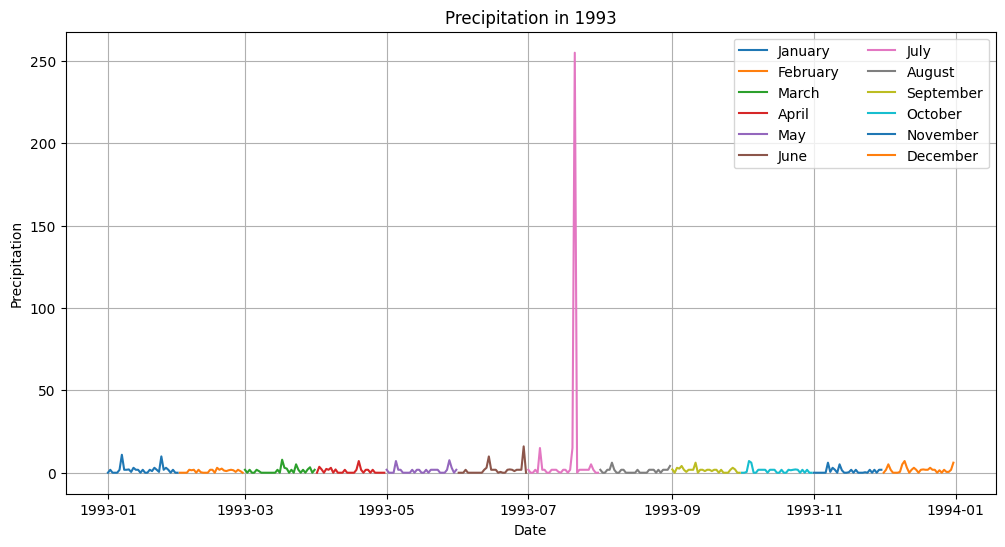

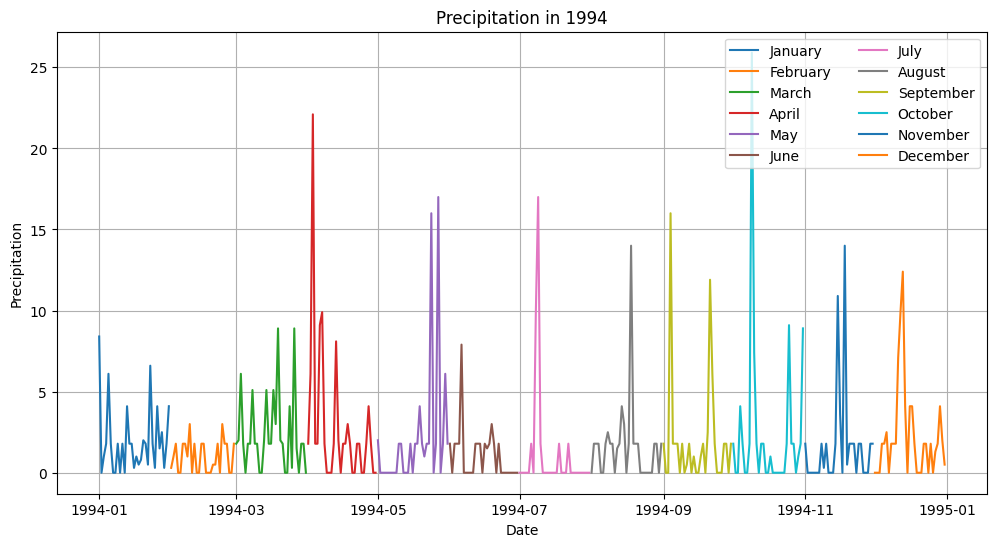

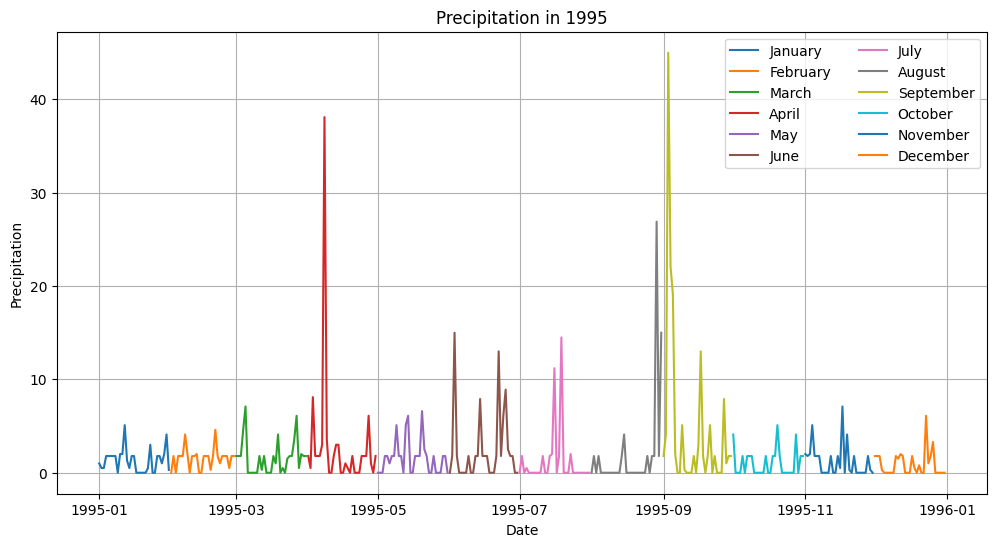

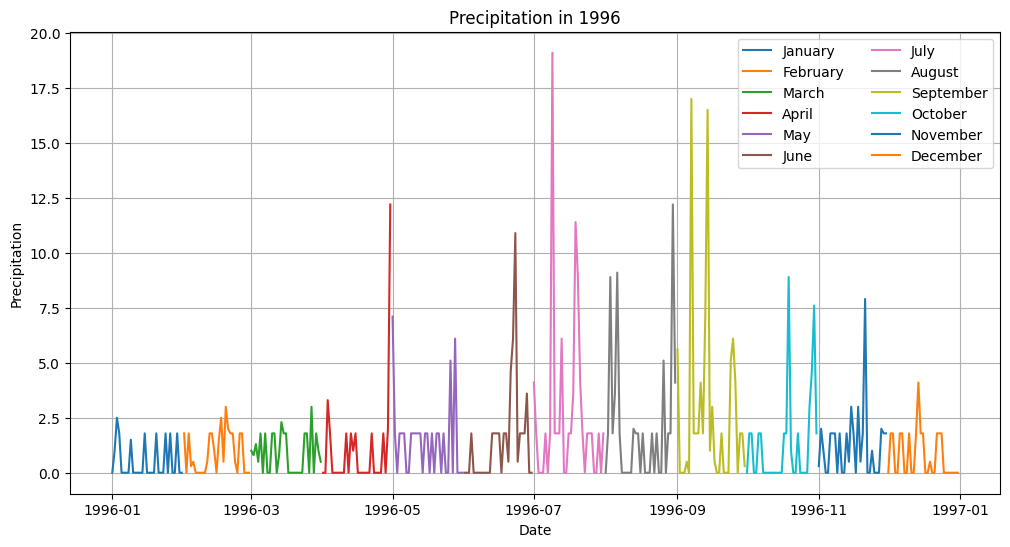

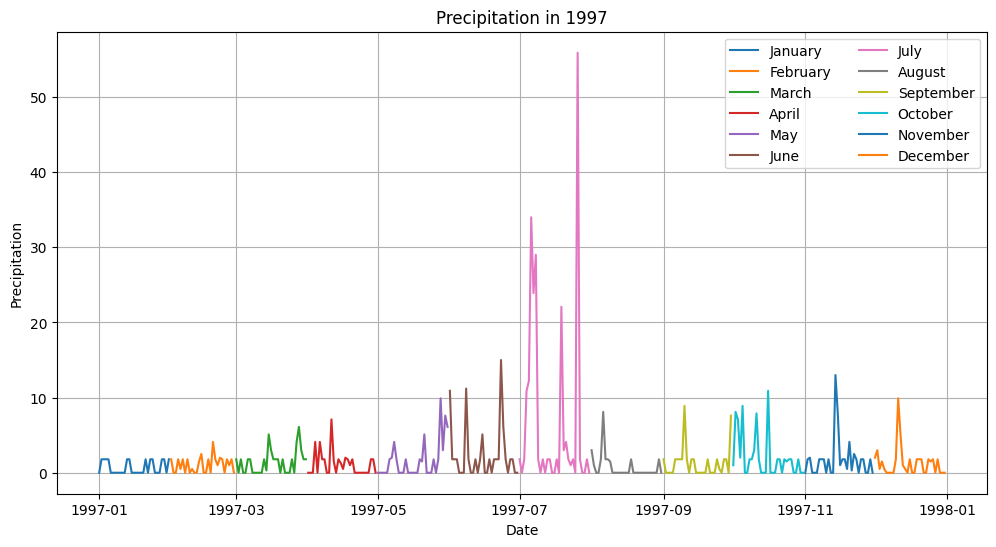

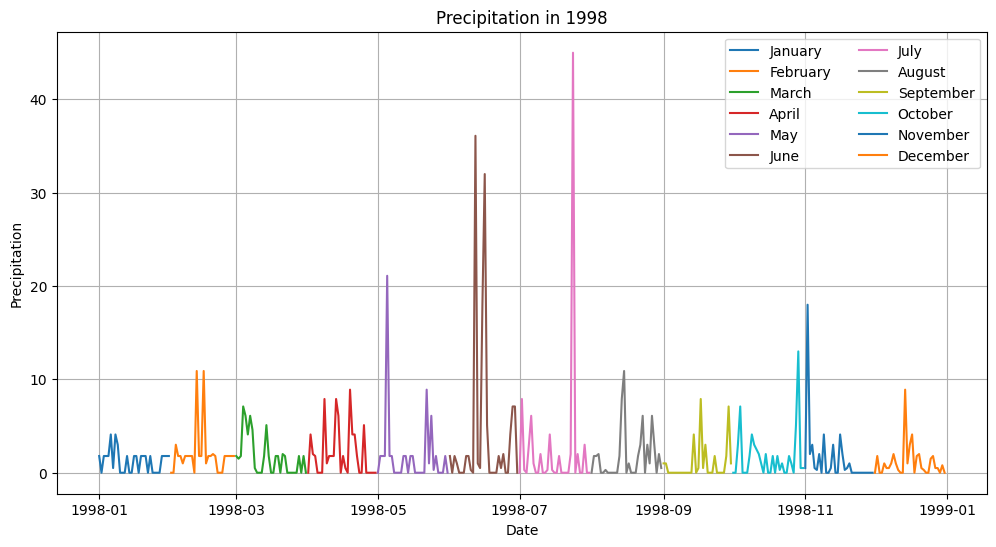

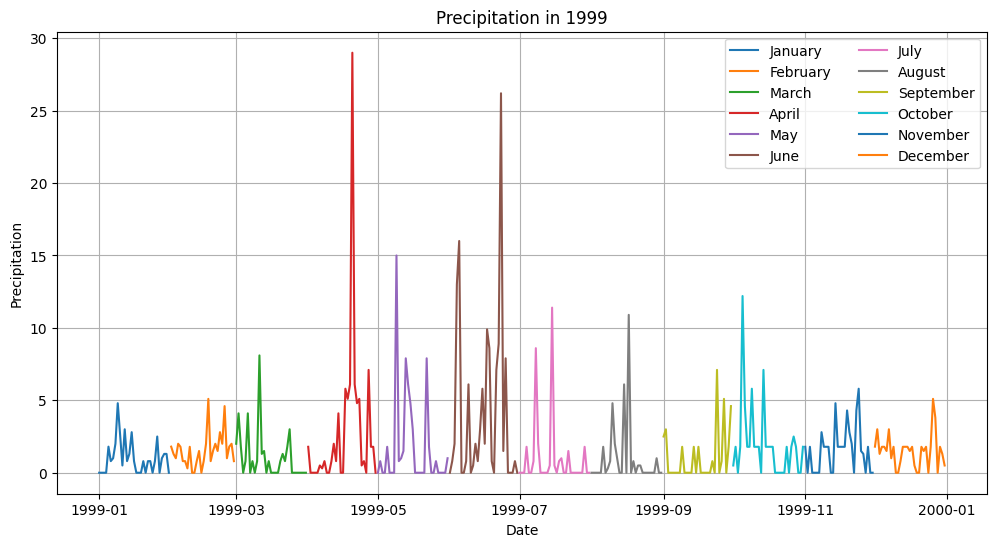

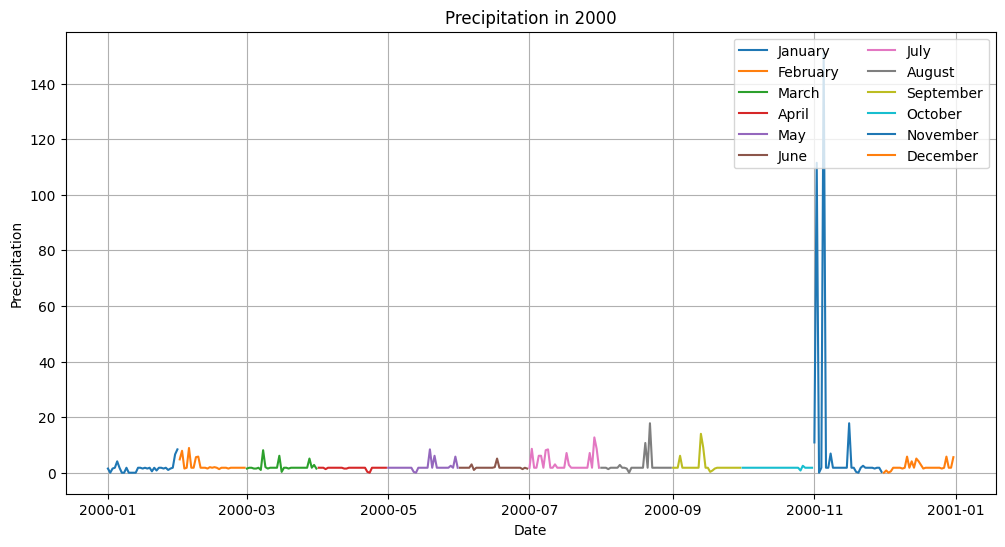

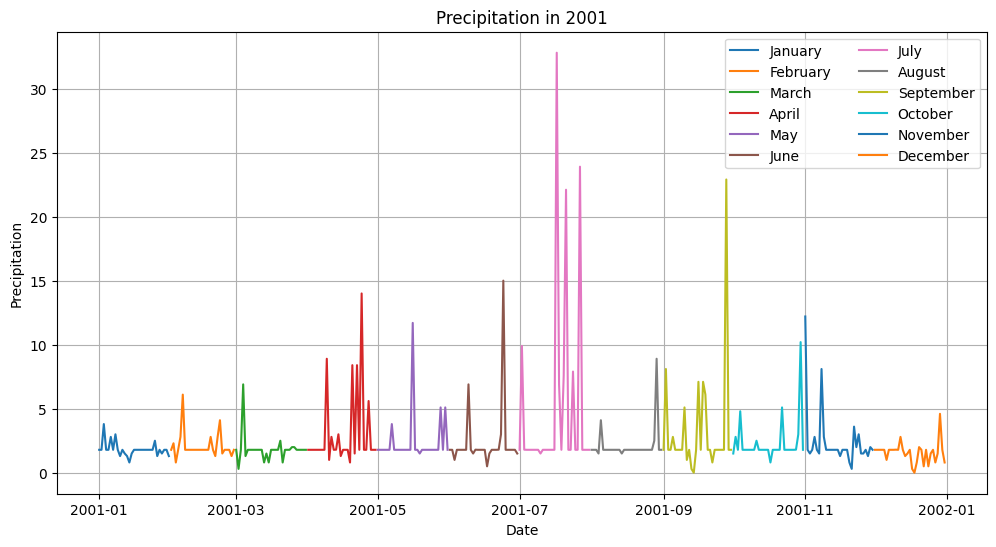

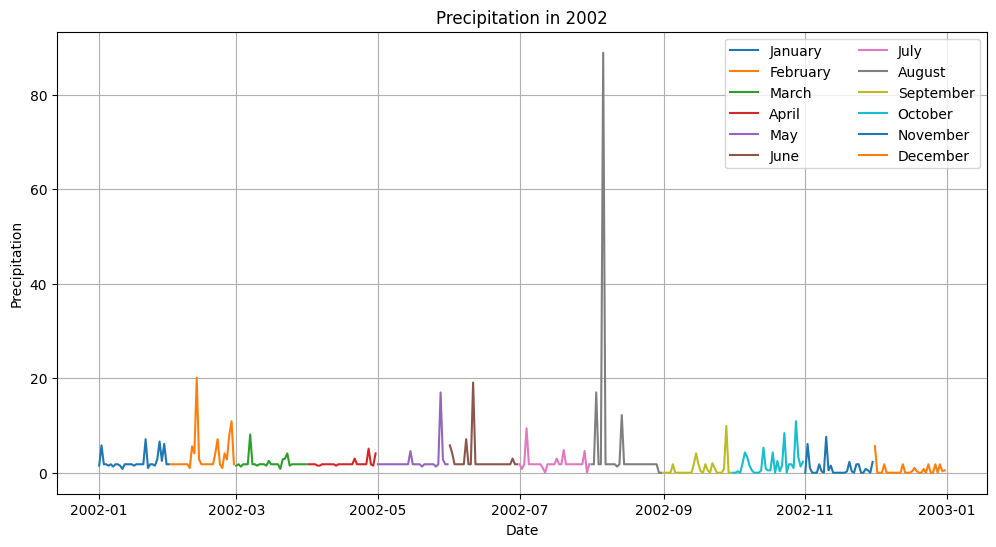

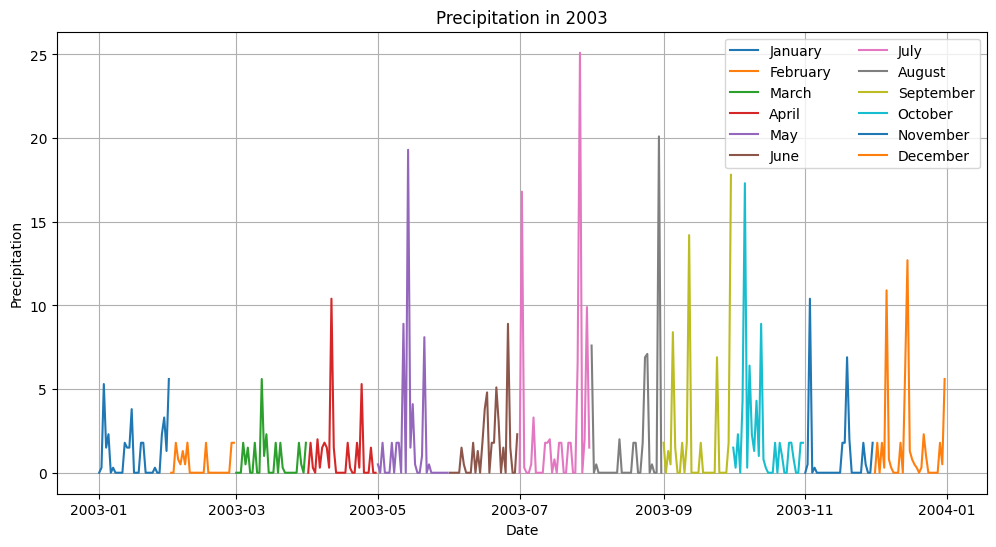

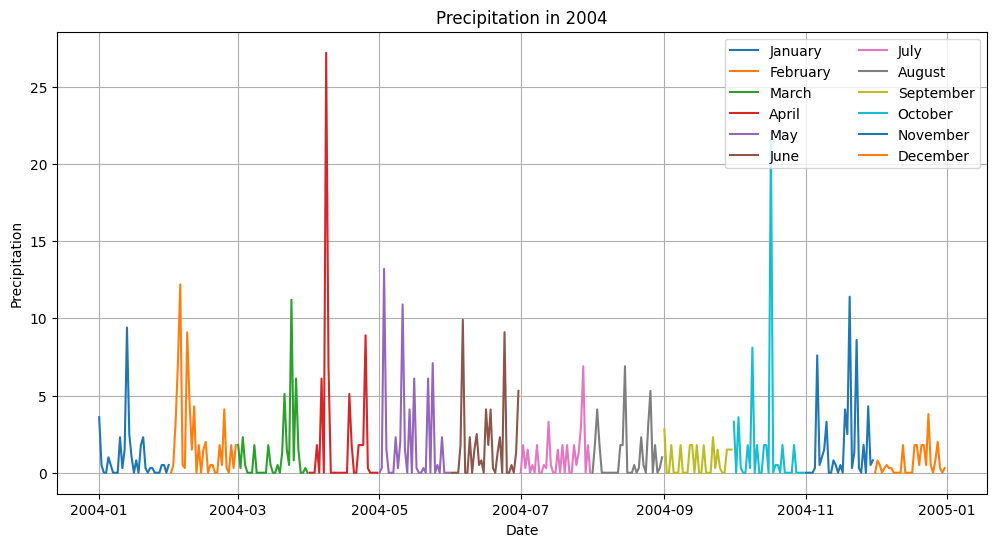

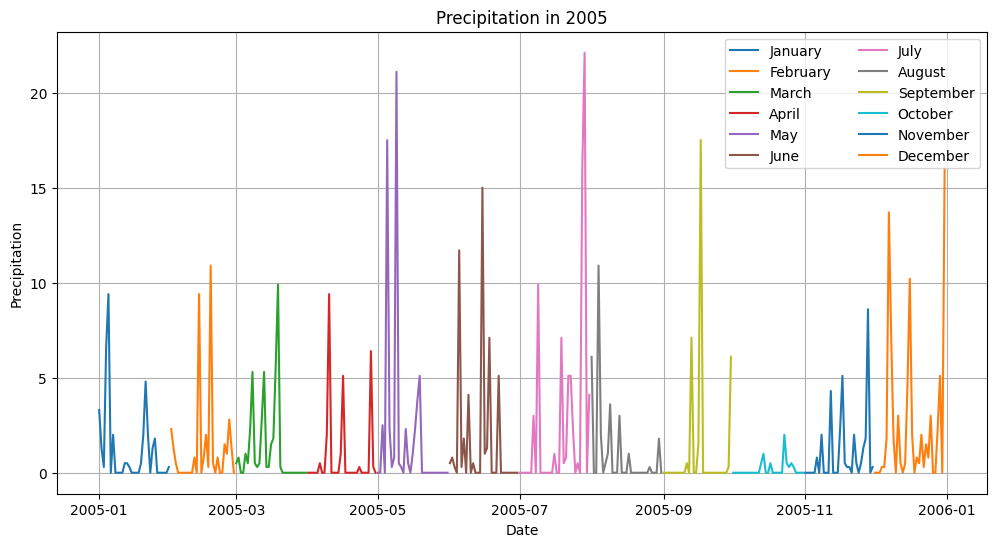

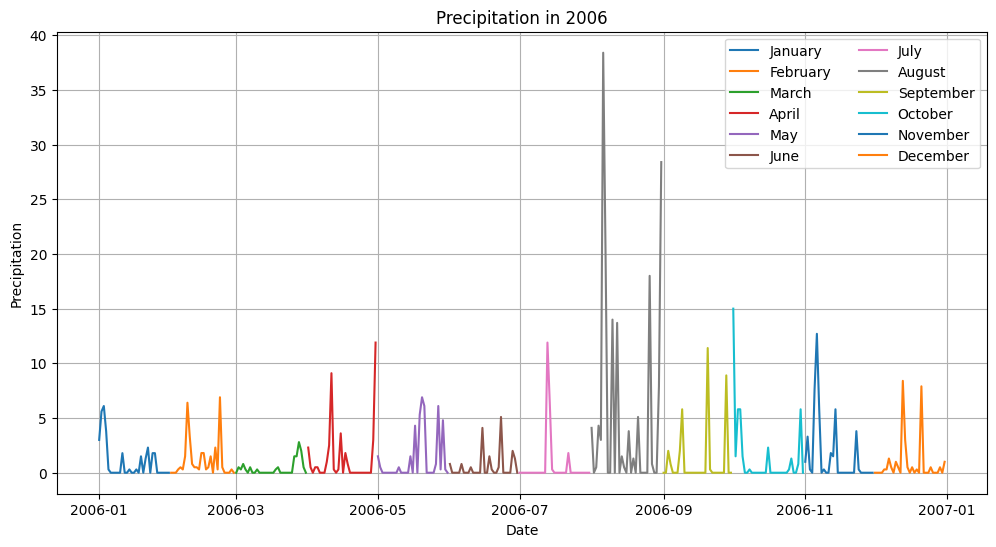

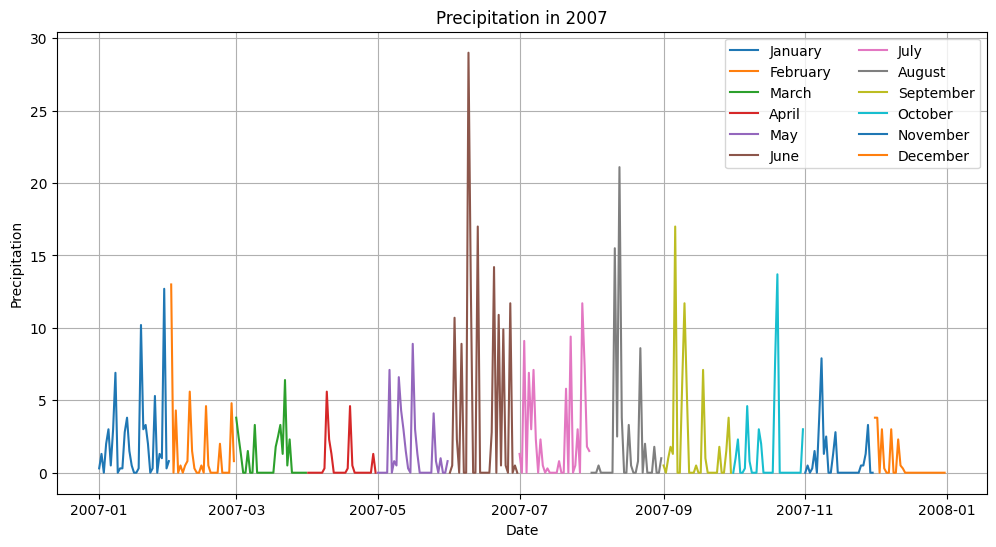

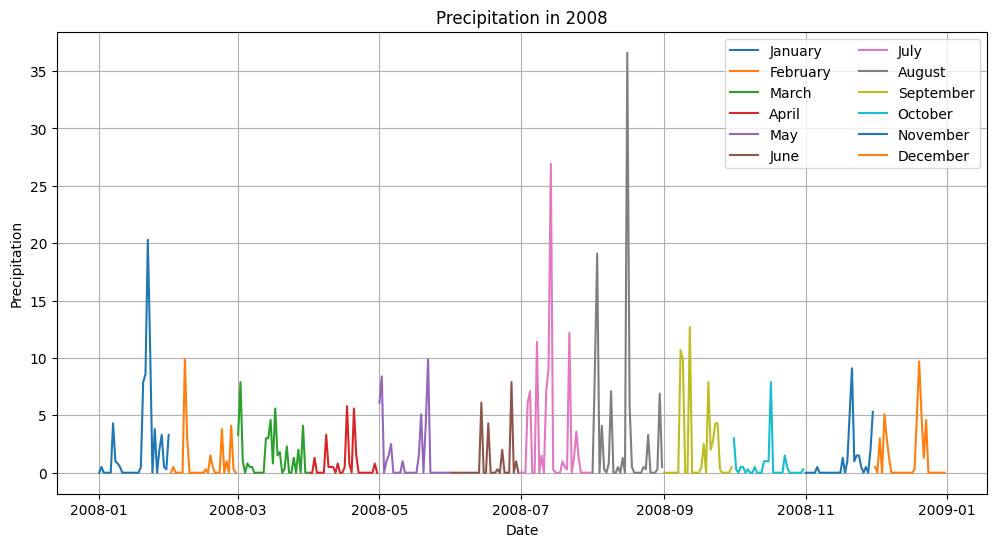

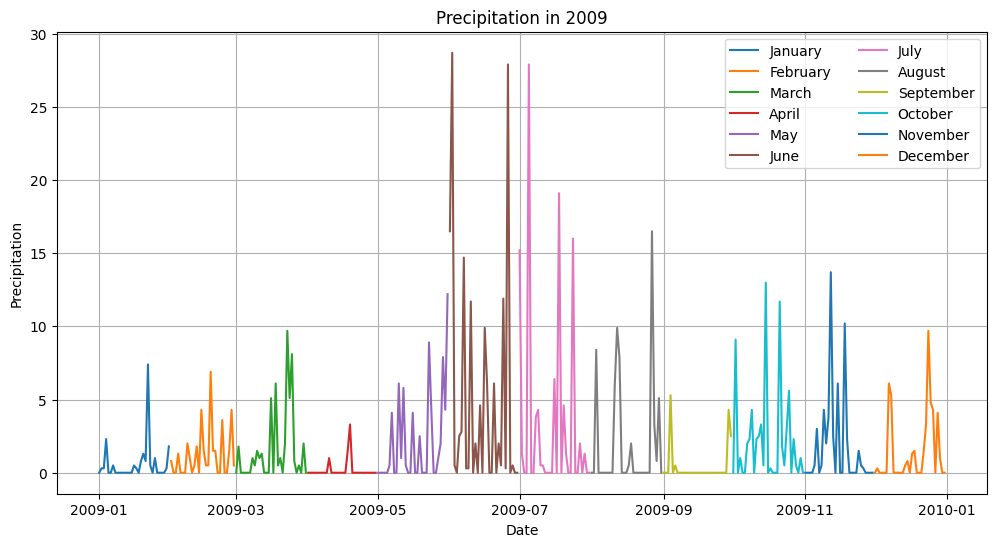

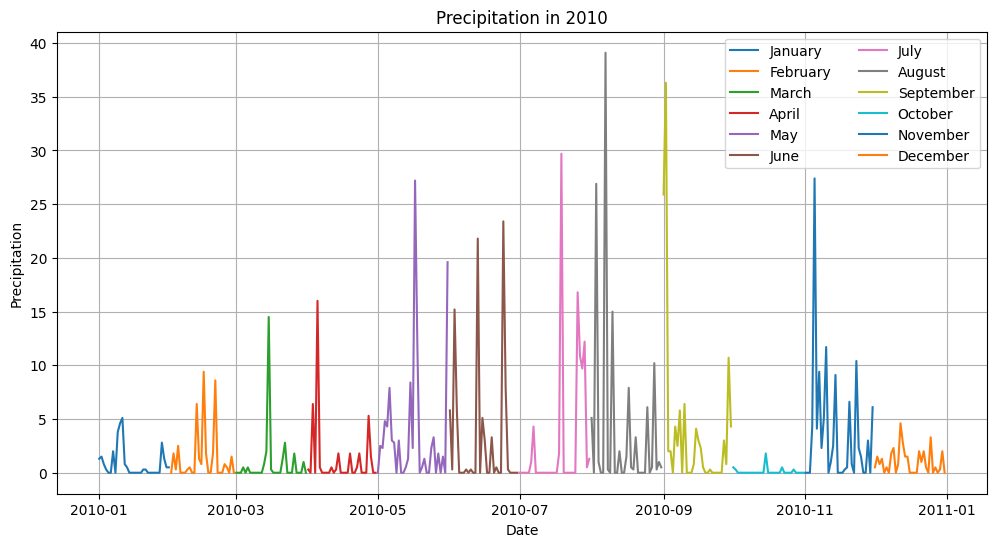

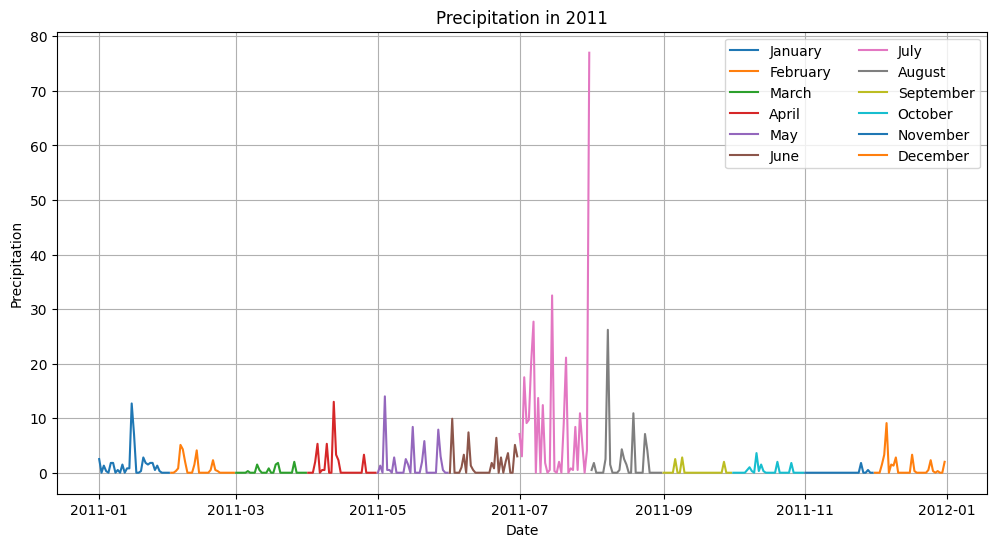

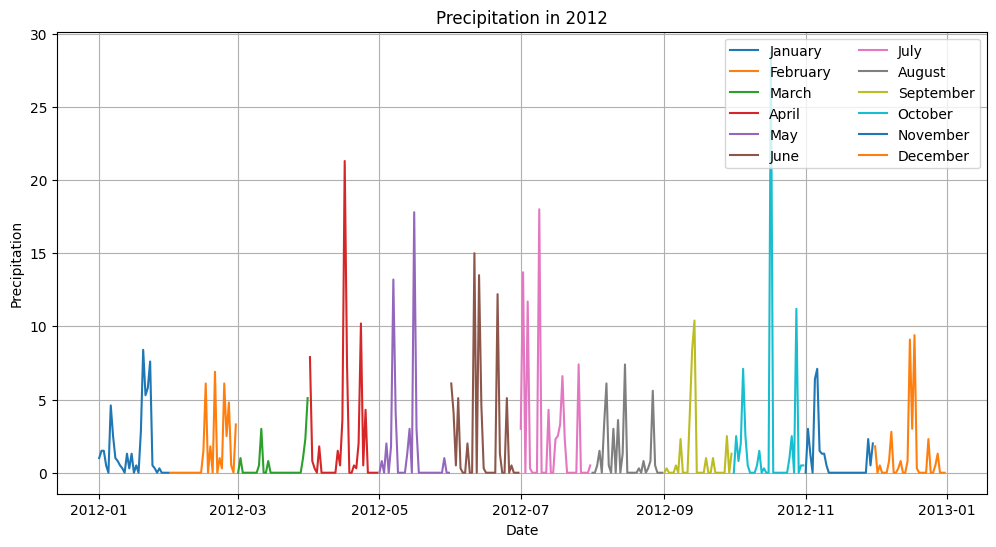

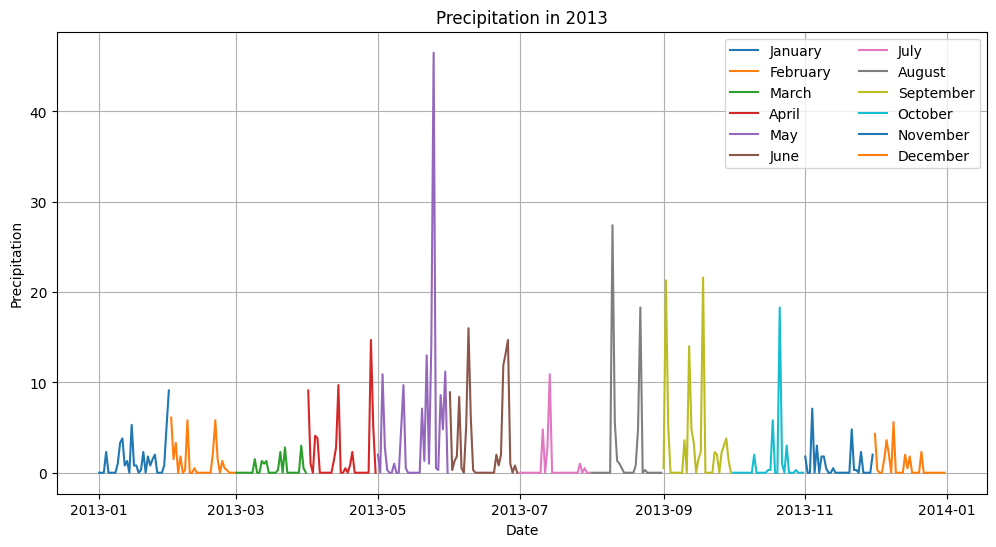

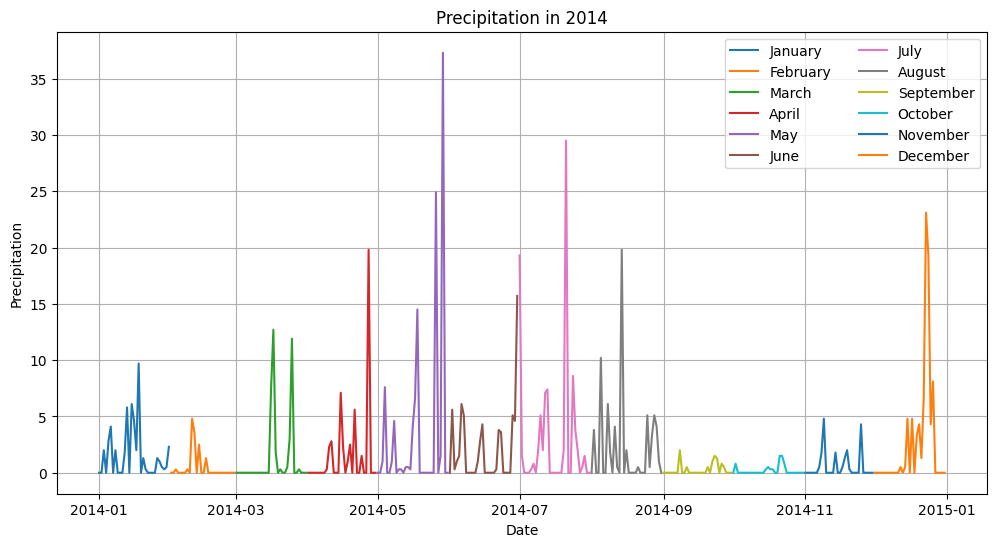

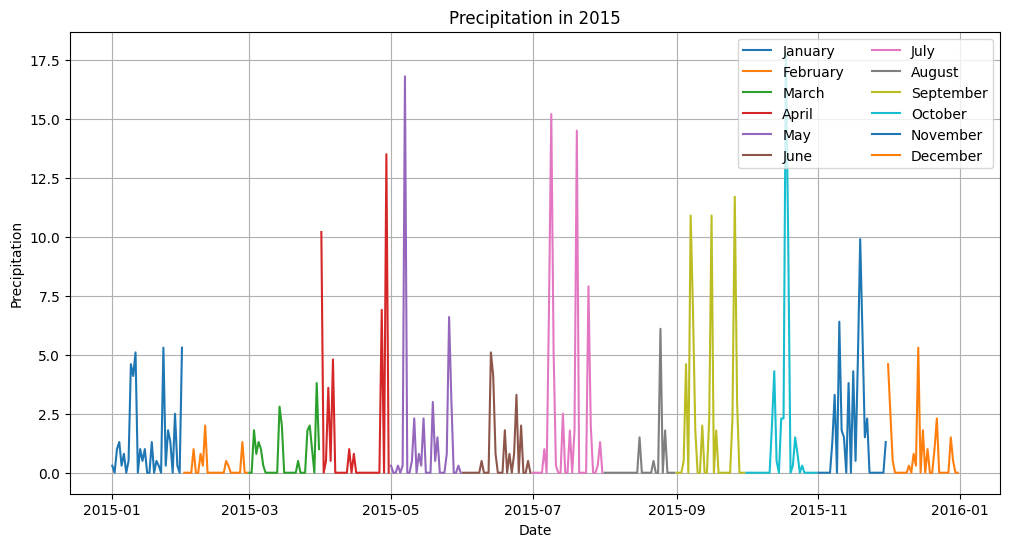

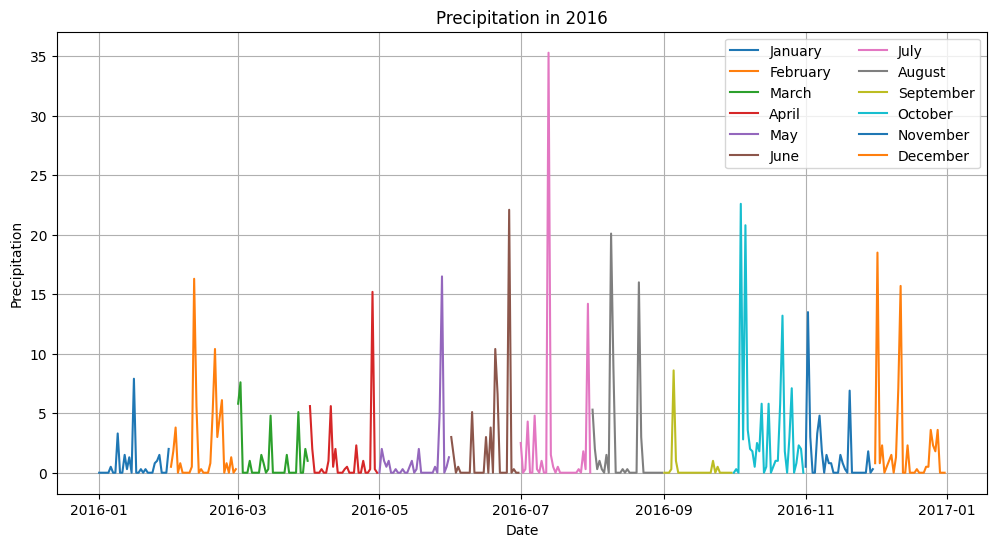

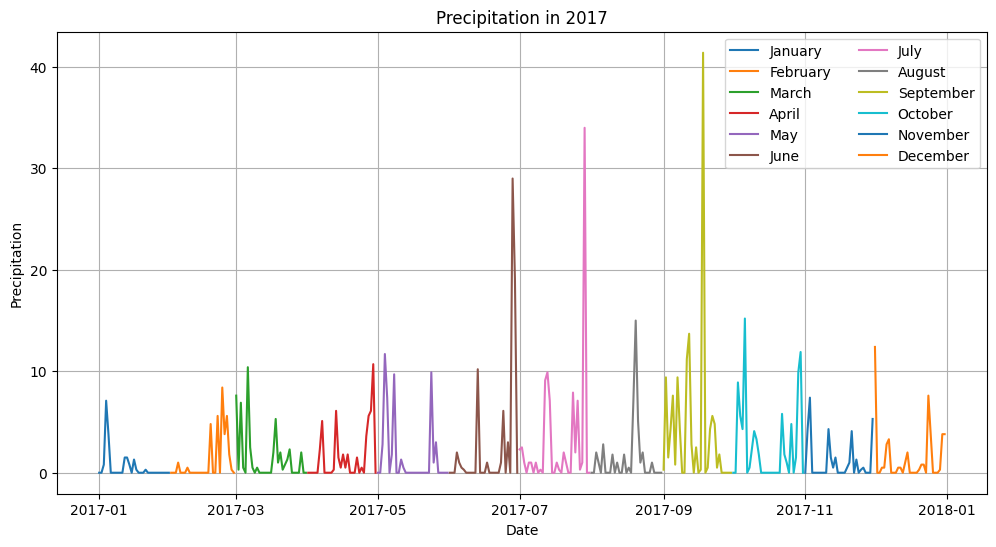

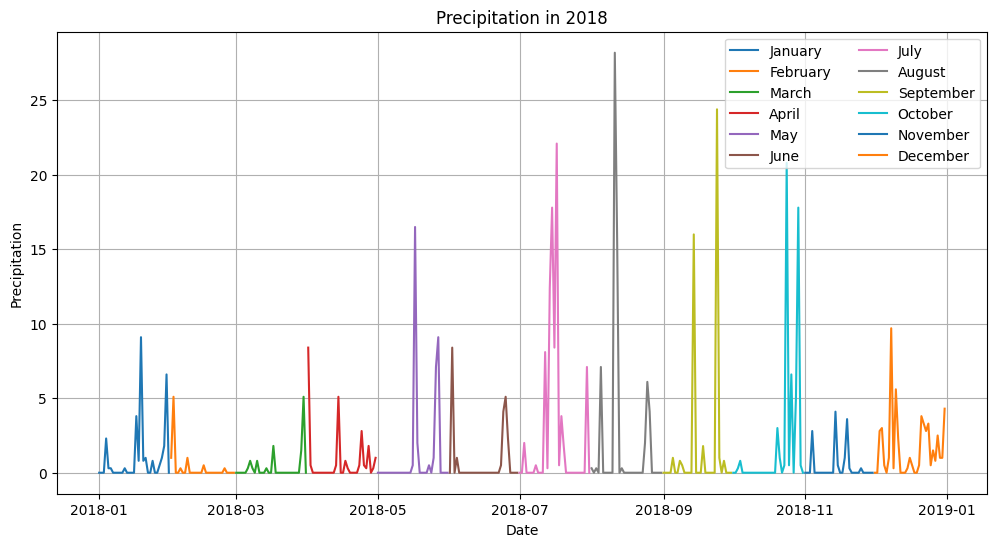

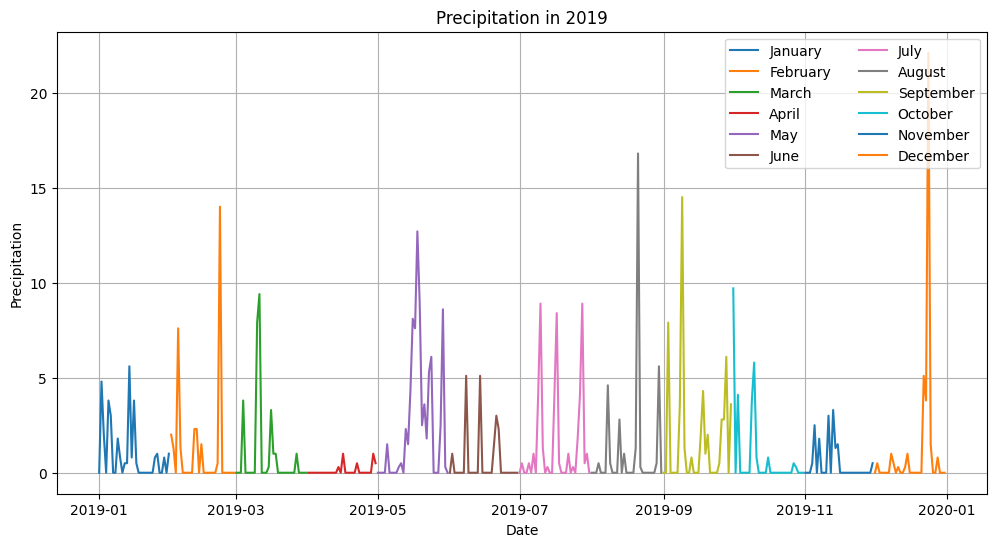

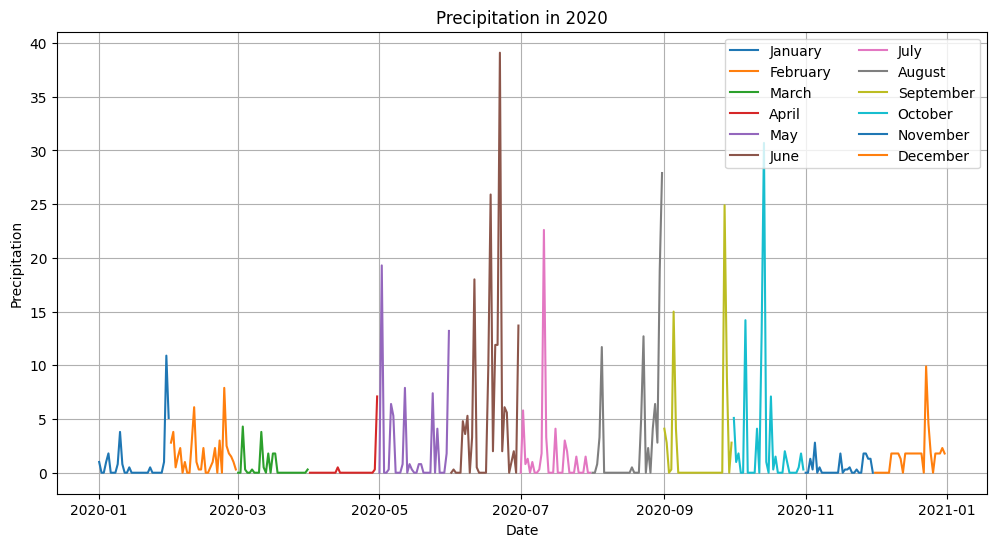

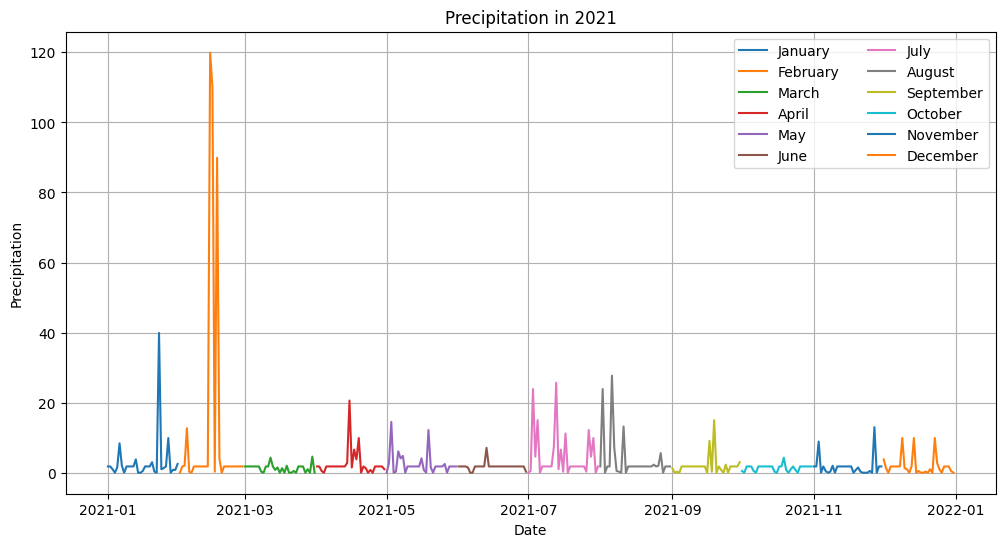

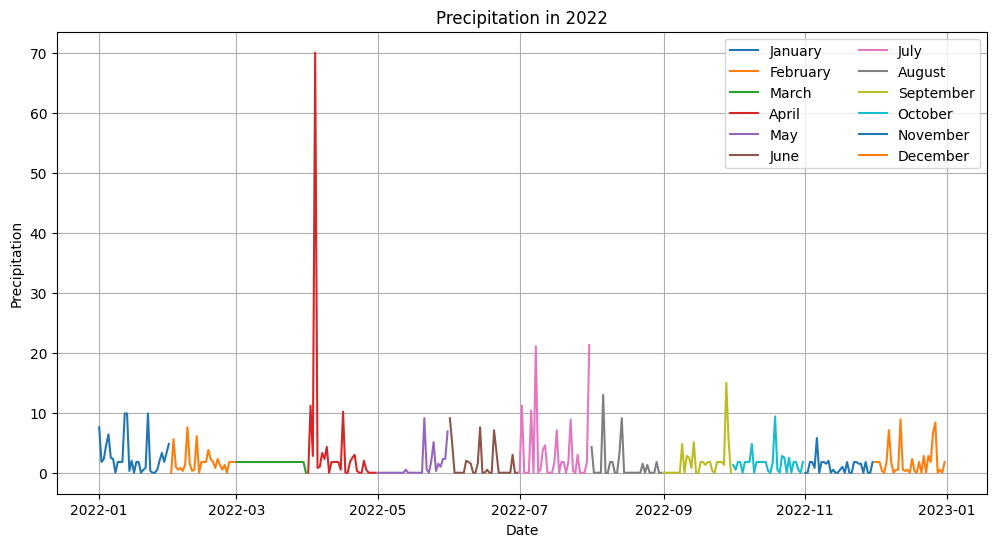

In [55]:
for year in years:
    plt.figure(figsize=(12,6))
    
    for month in months_names:
        month_data = globals()[f'{month}_data']
        month_year_data = month_data[month_data['YEAR'] == year]
        plt.plot(month_year_data['DATE'], month_year_data['PRCP'], label=month.capitalize())
        
    plt.title(f'Precipitation in {year}')
    plt.xlabel('Date')
    plt.ylabel('Precipitation')
    plt.legend(loc='upper right', ncol=2)
    plt.grid(True)
    plt.show()

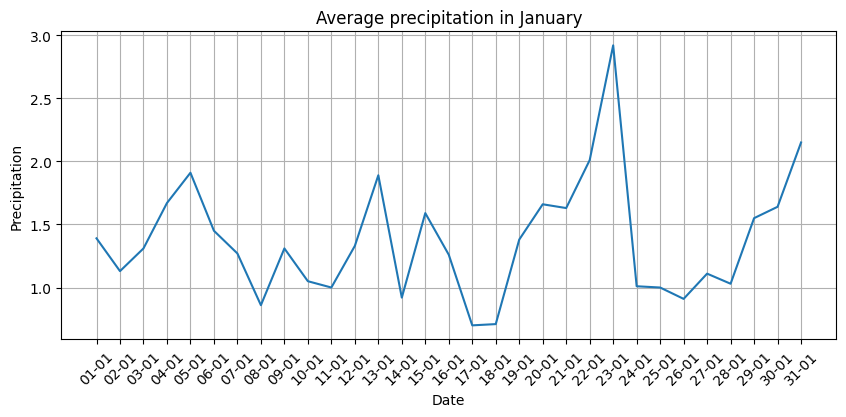

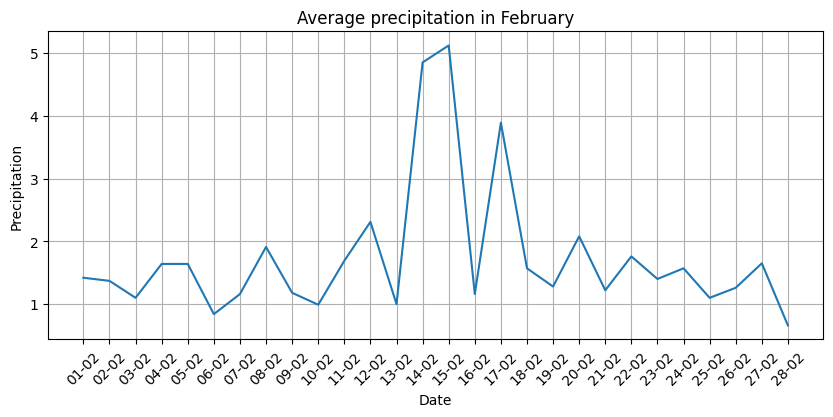

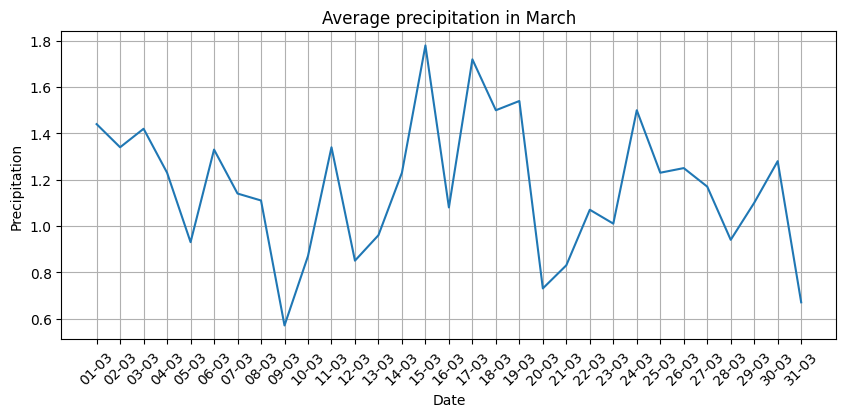

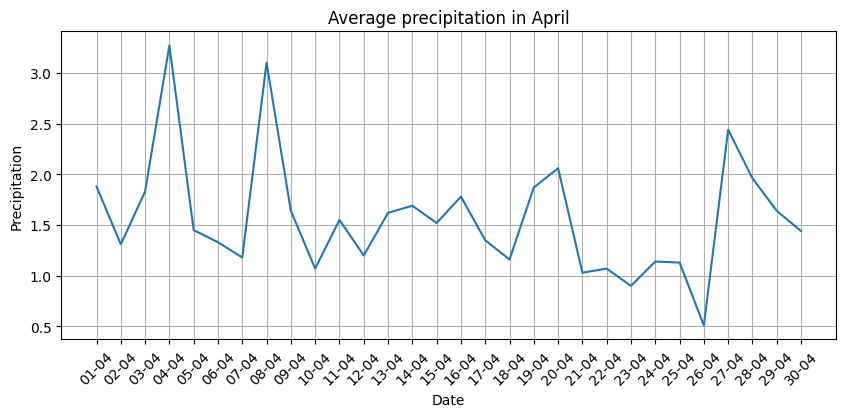

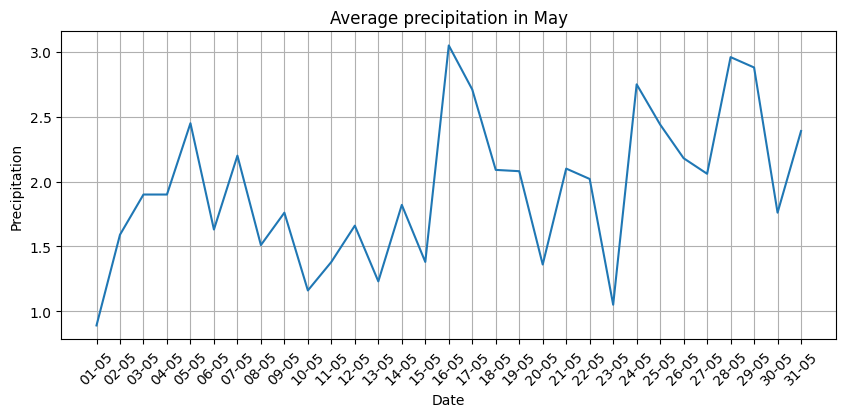

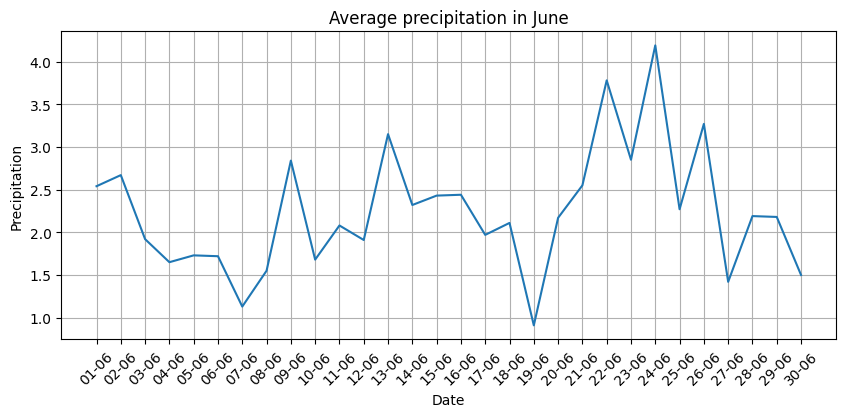

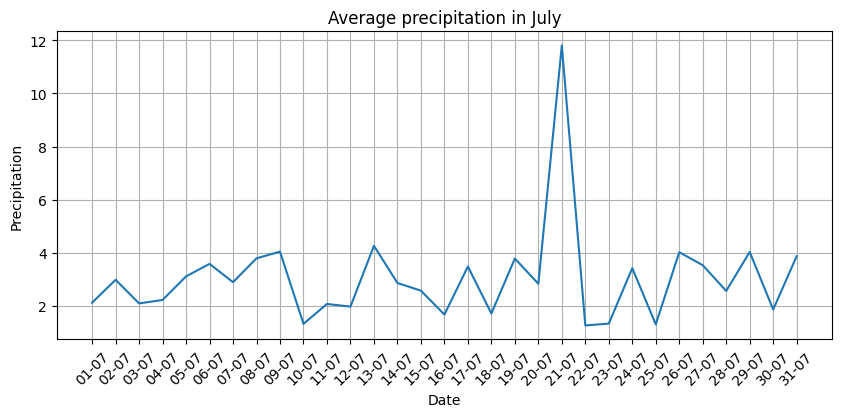

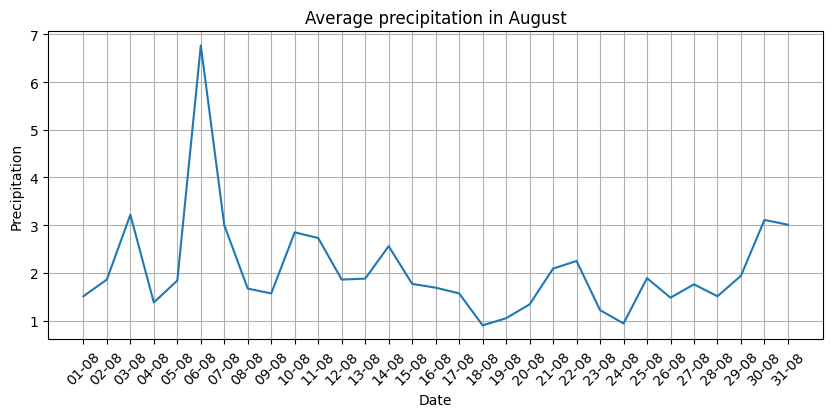

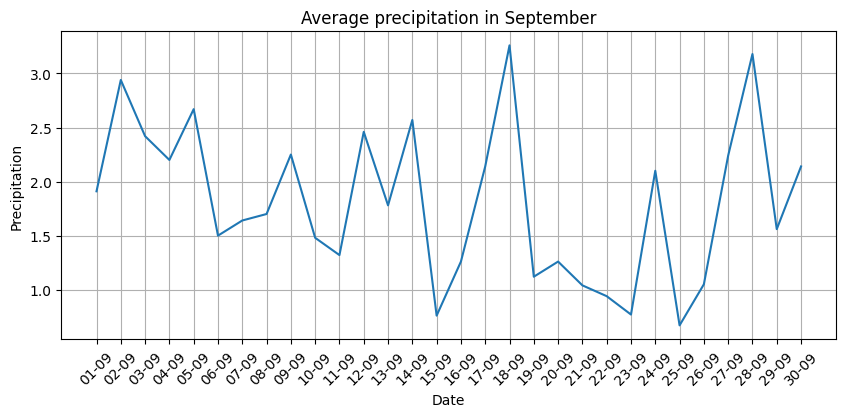

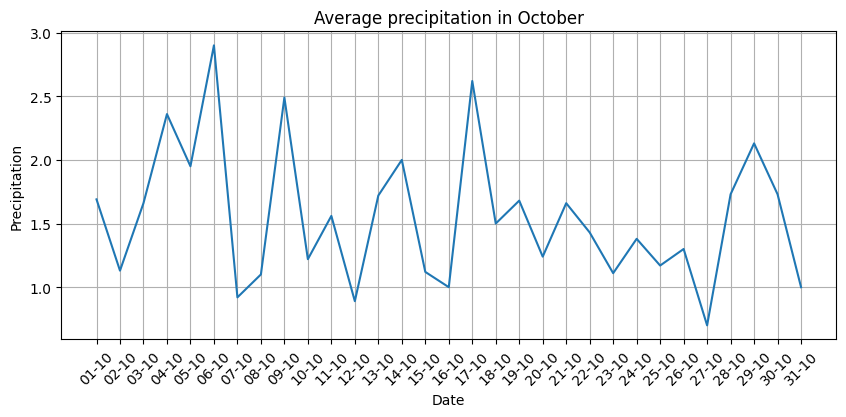

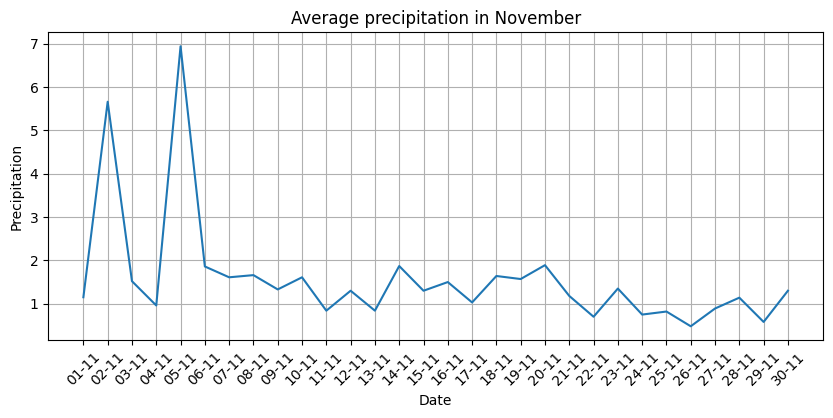

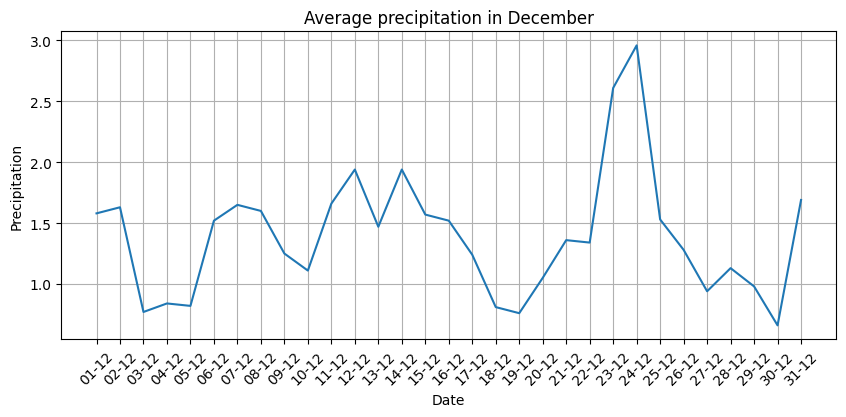

In [54]:
for month in months_names:
    plt.figure(figsize=(10,4))
    month_data = globals()[f'{month}_data']
    month_1993 = month_data[month_data['YEAR'] == 1993]
    
    plt.plot(month_1993['DATE'].dt.strftime('%d-%m'), month_1993['AVG_PRCP'])
    plt.title(f'Average precipitation in {month.capitalize()}')
    plt.xlabel('Date')
    plt.ylabel('Precipitation')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

### Visualisation - snow depth in different years

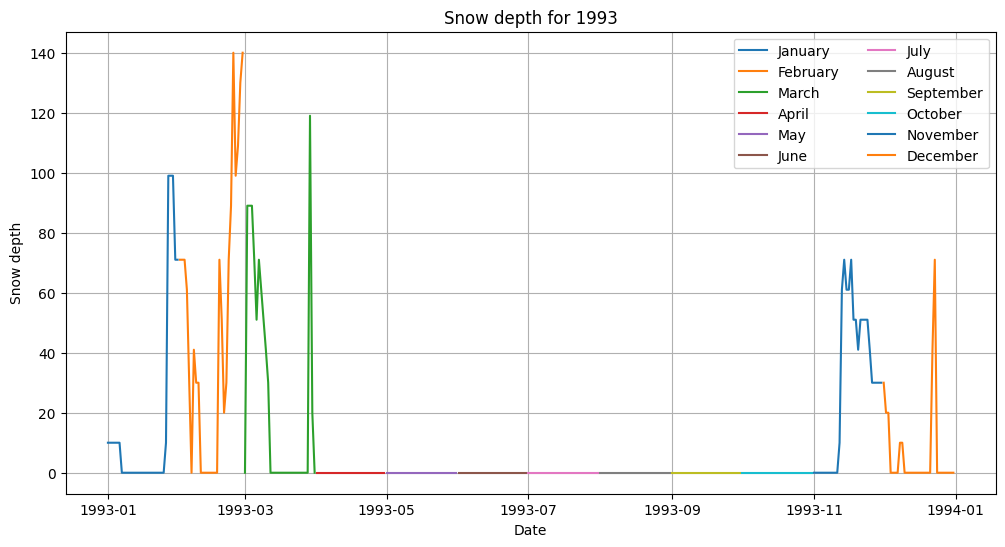

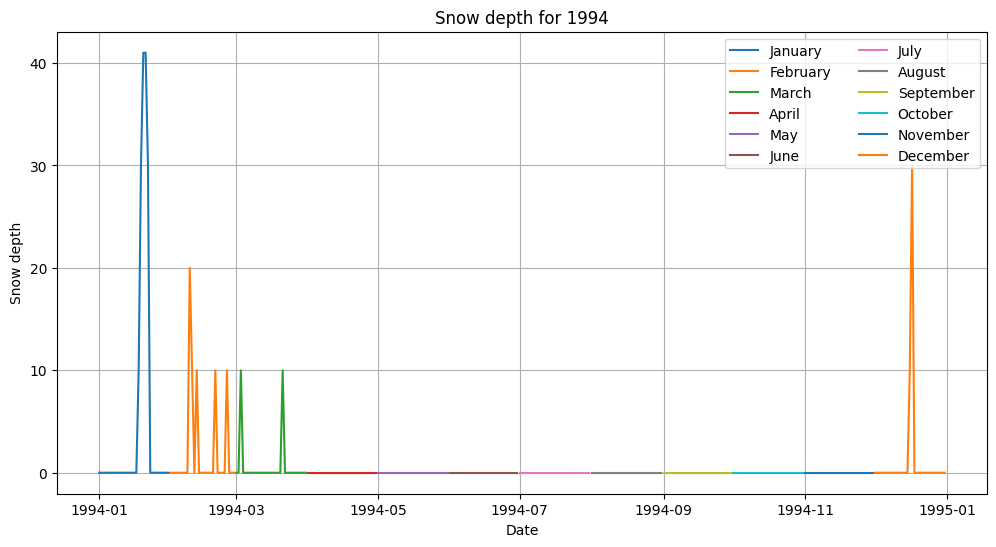

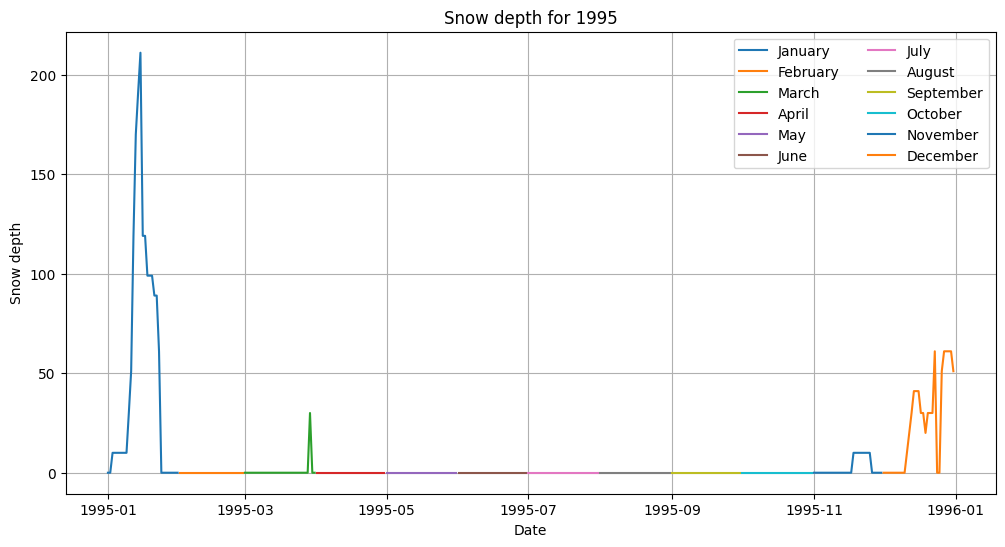

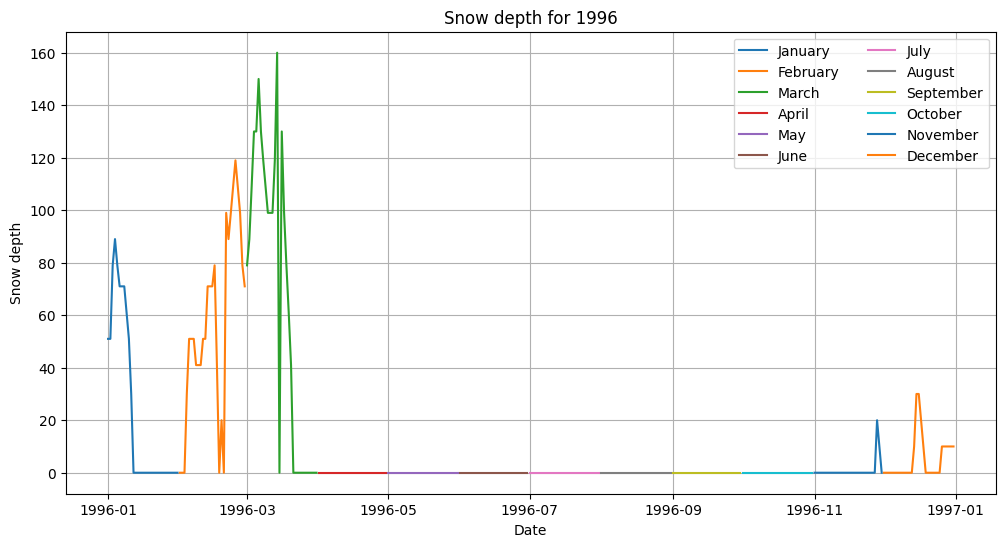

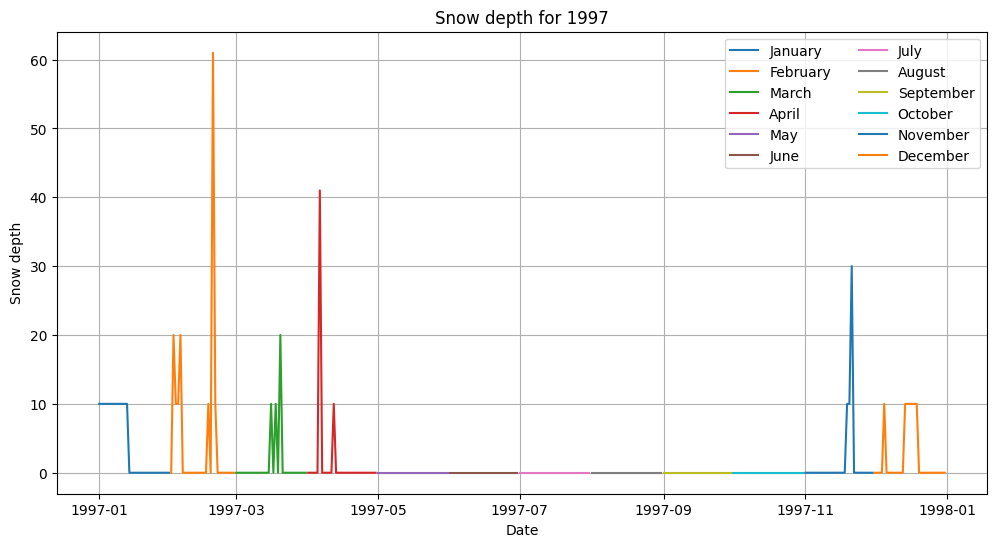

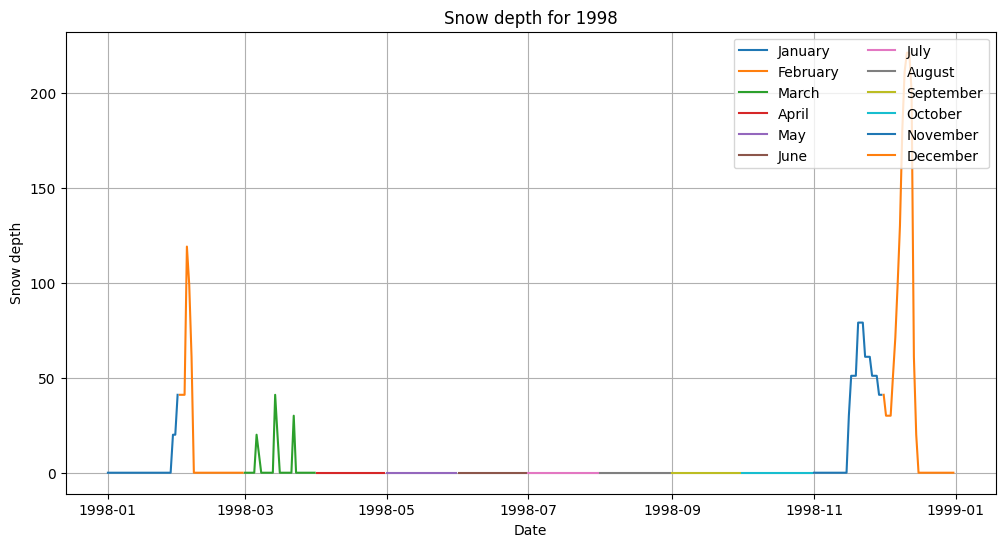

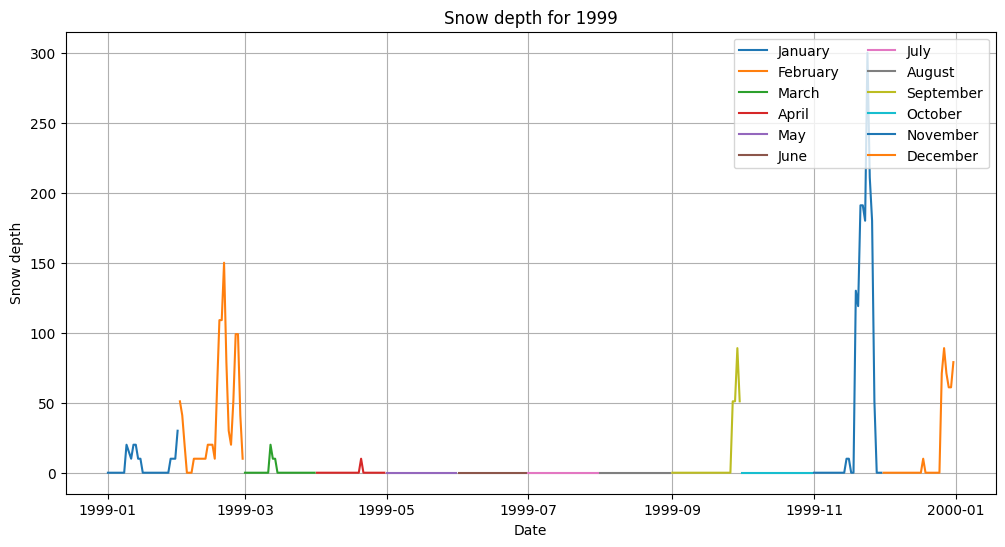

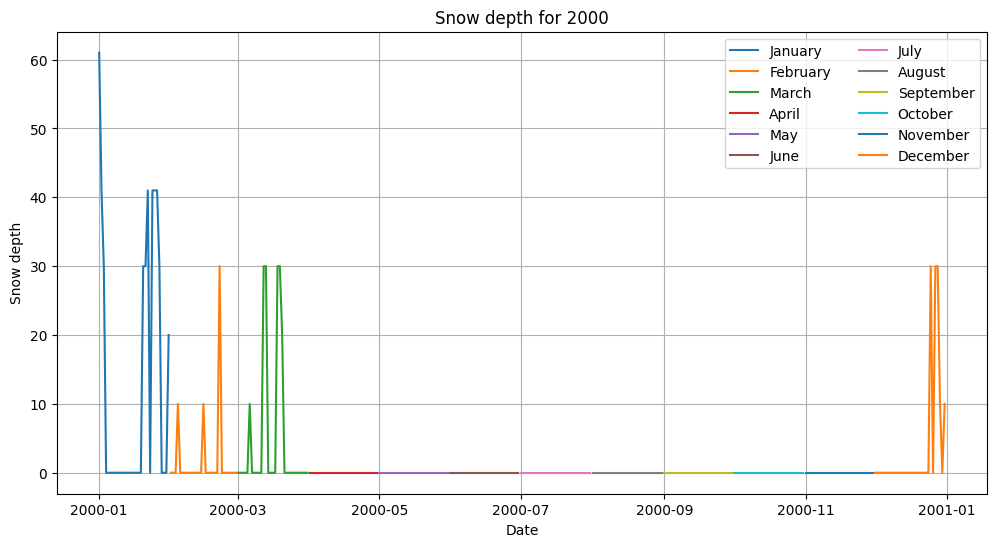

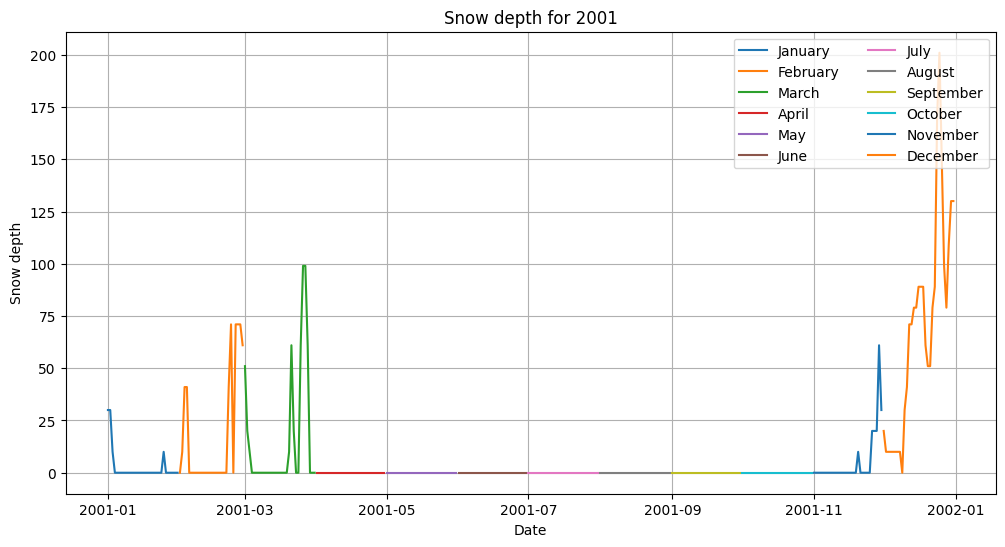

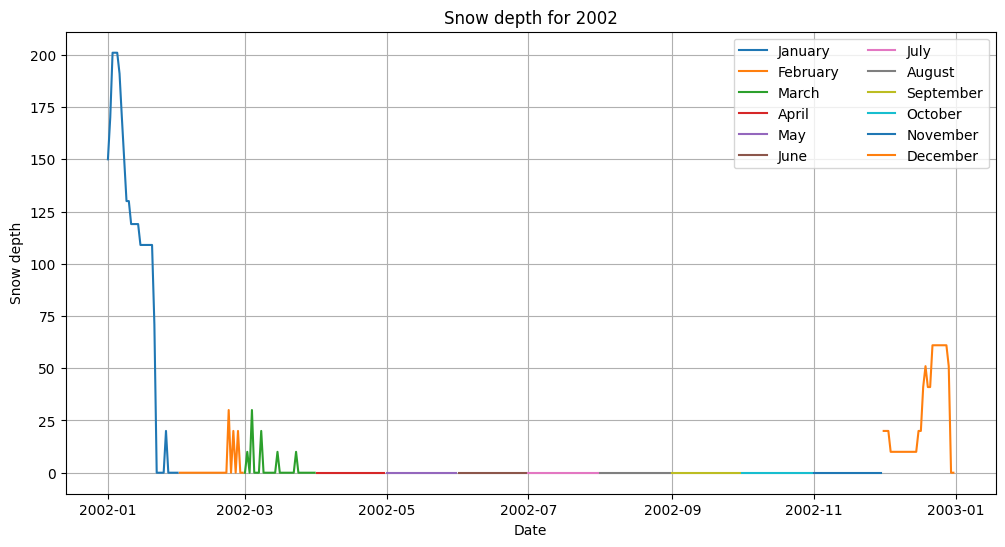

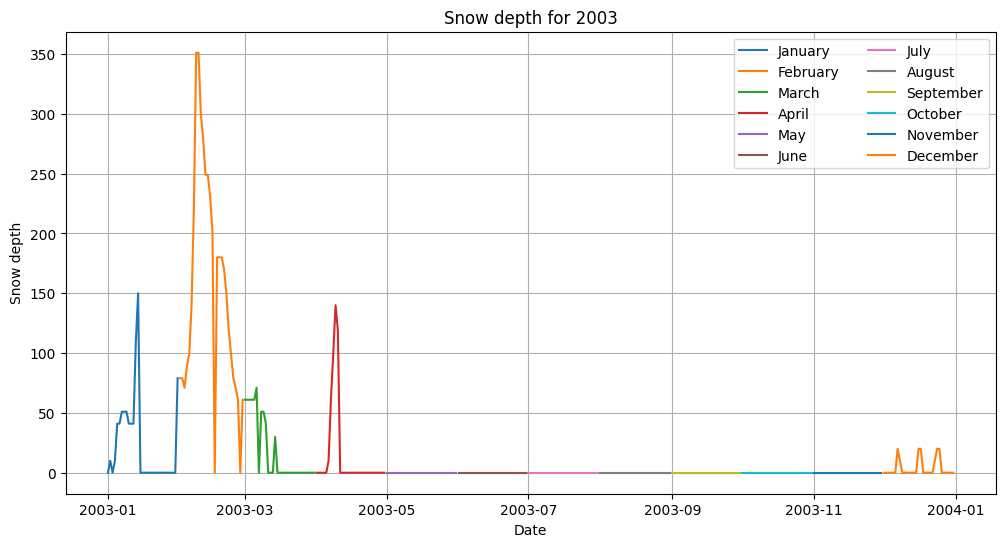

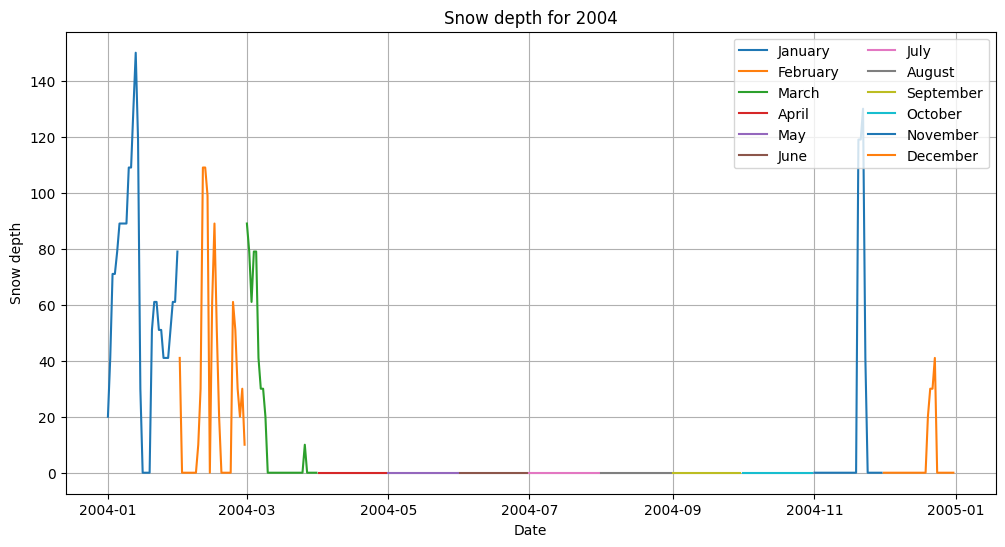

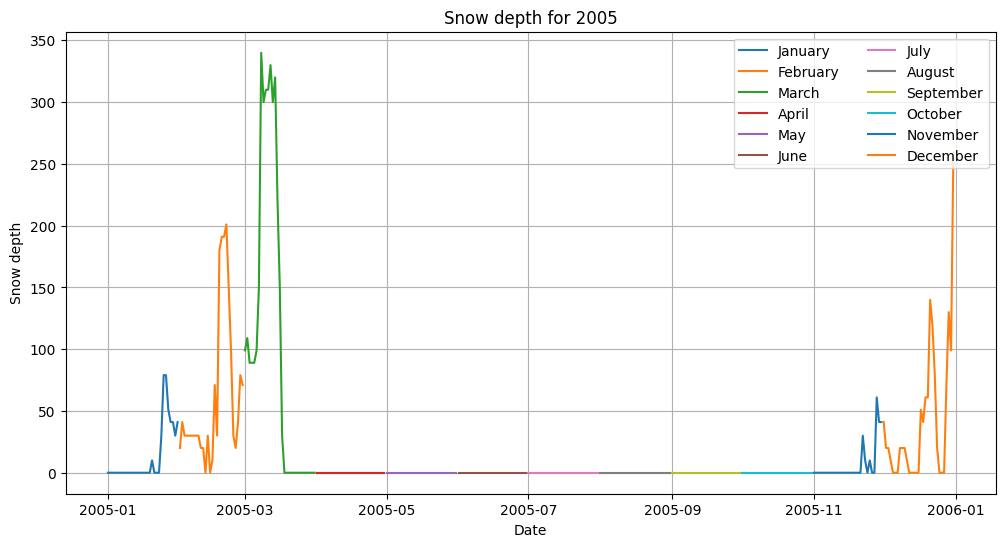

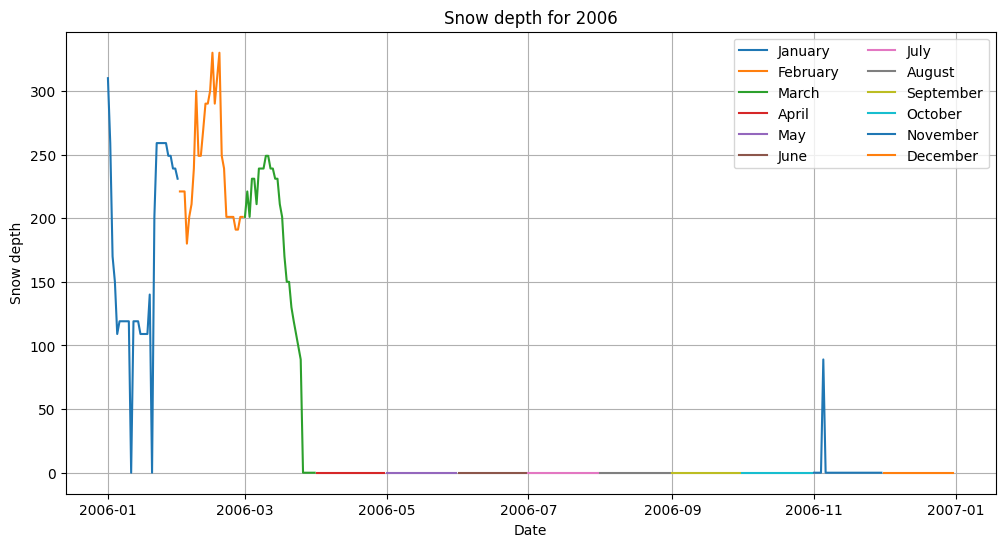

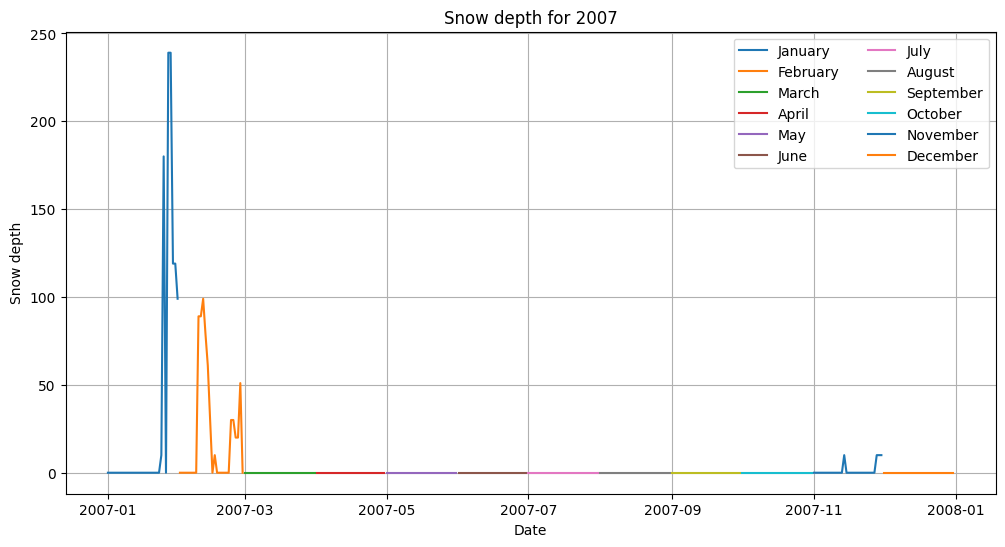

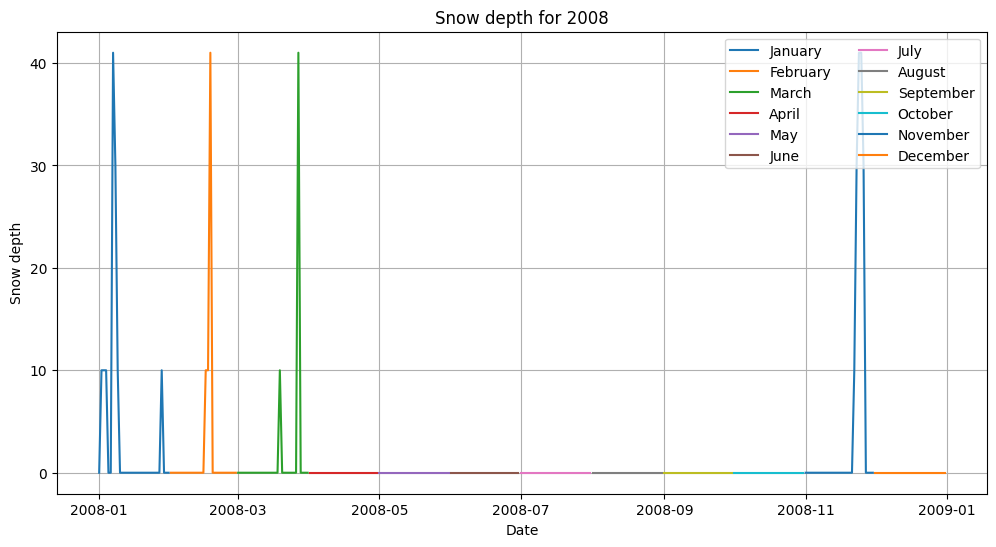

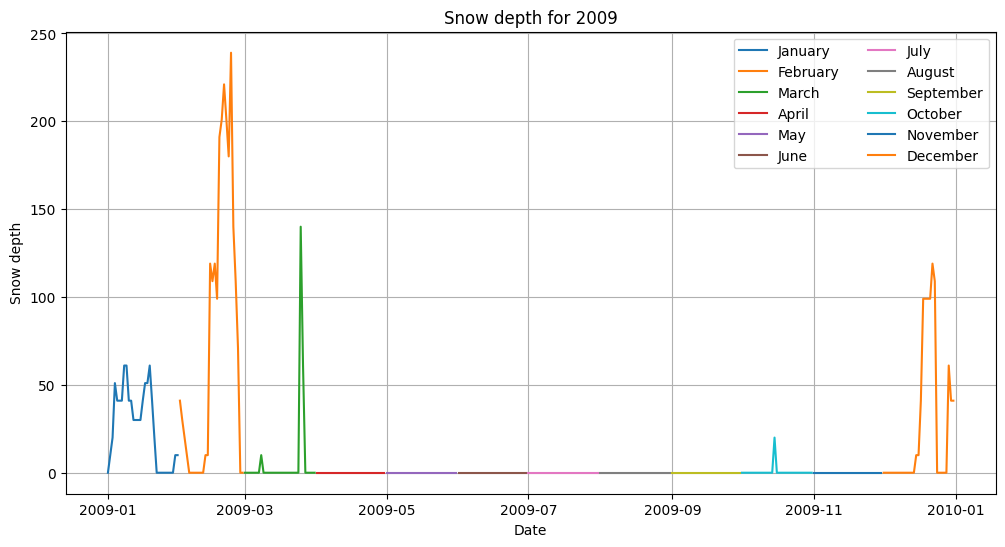

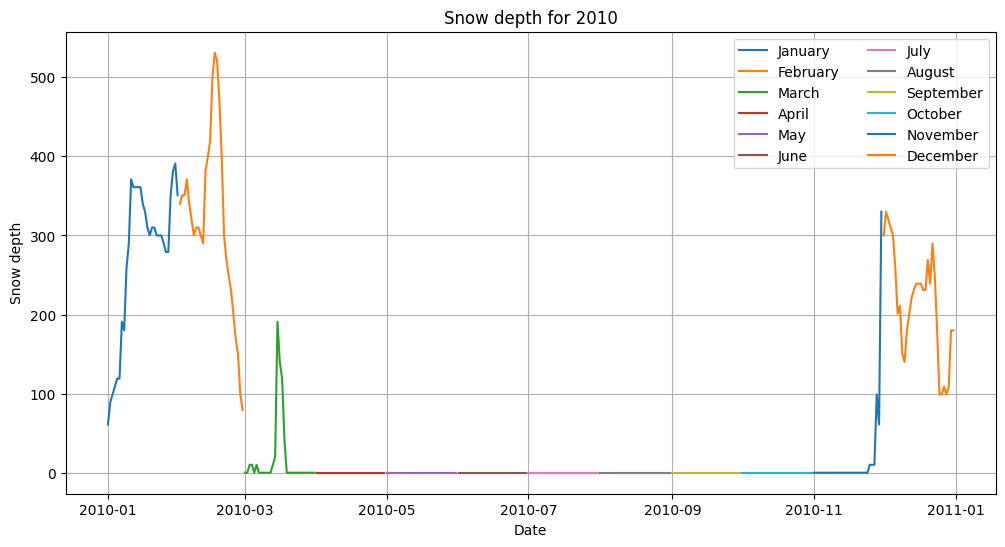

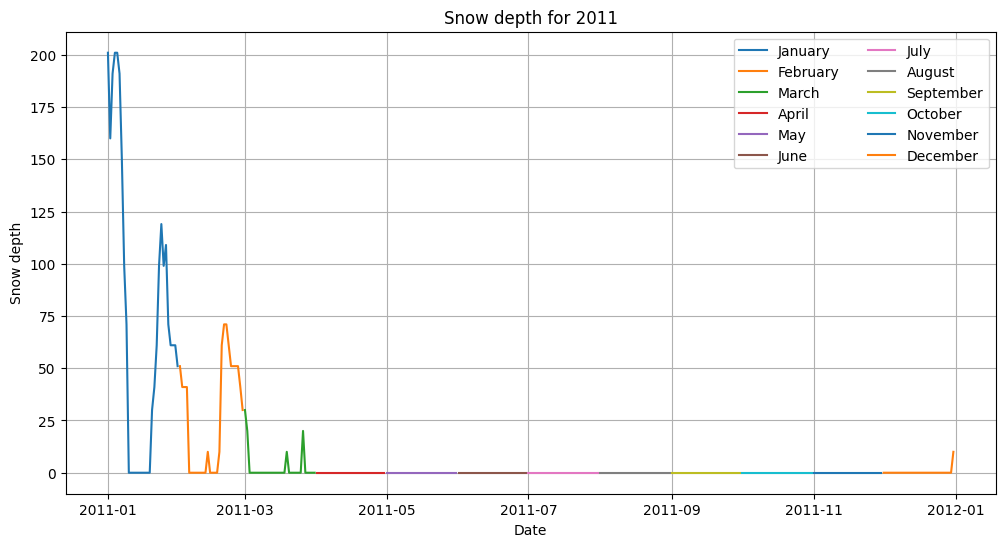

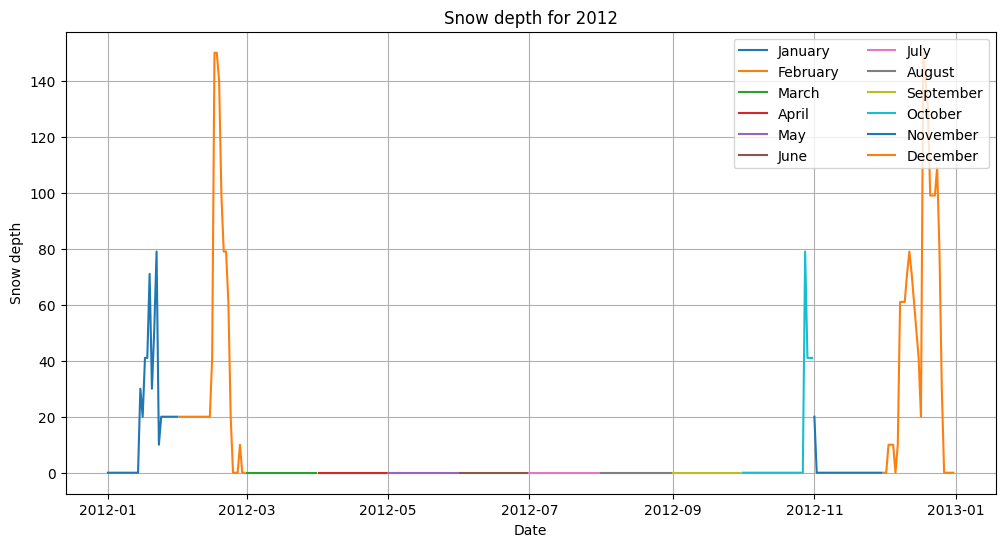

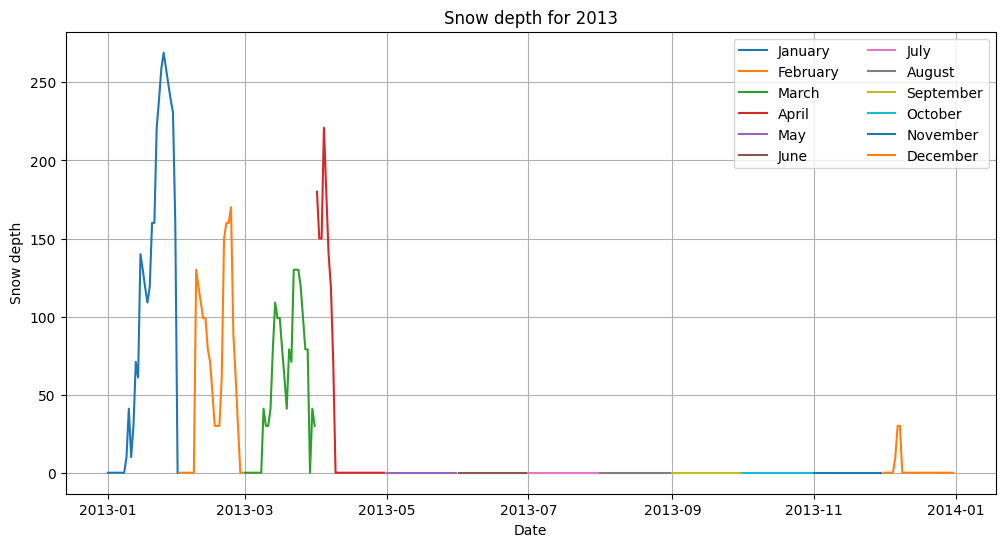

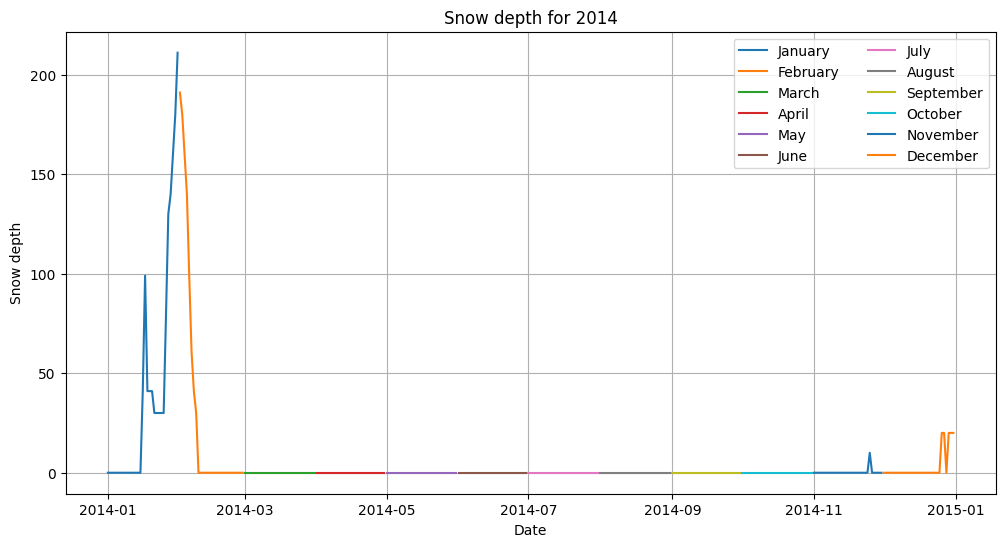

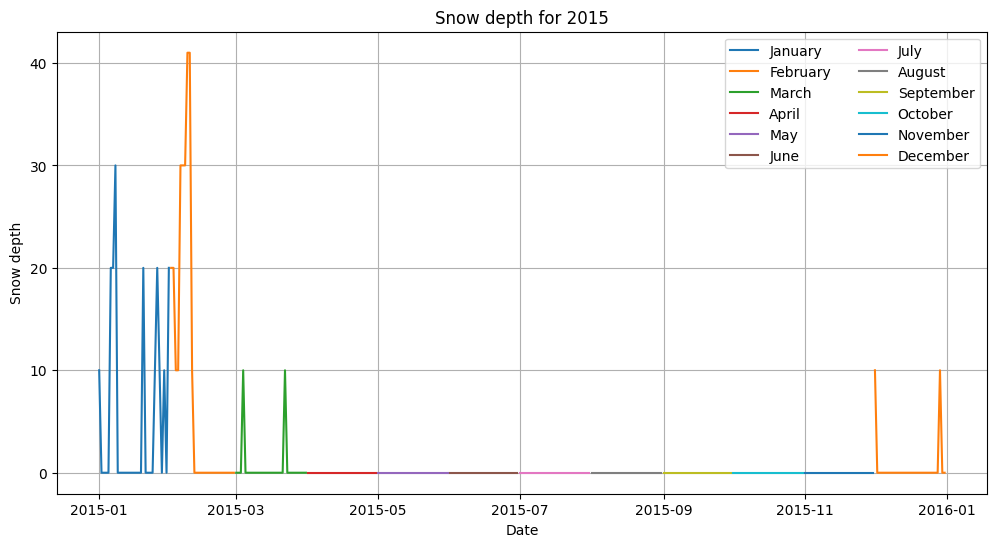

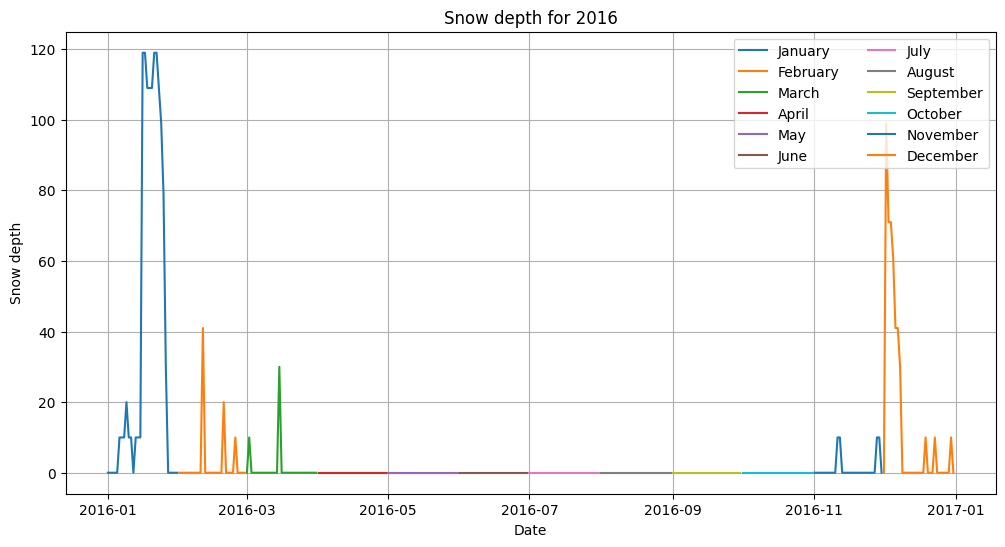

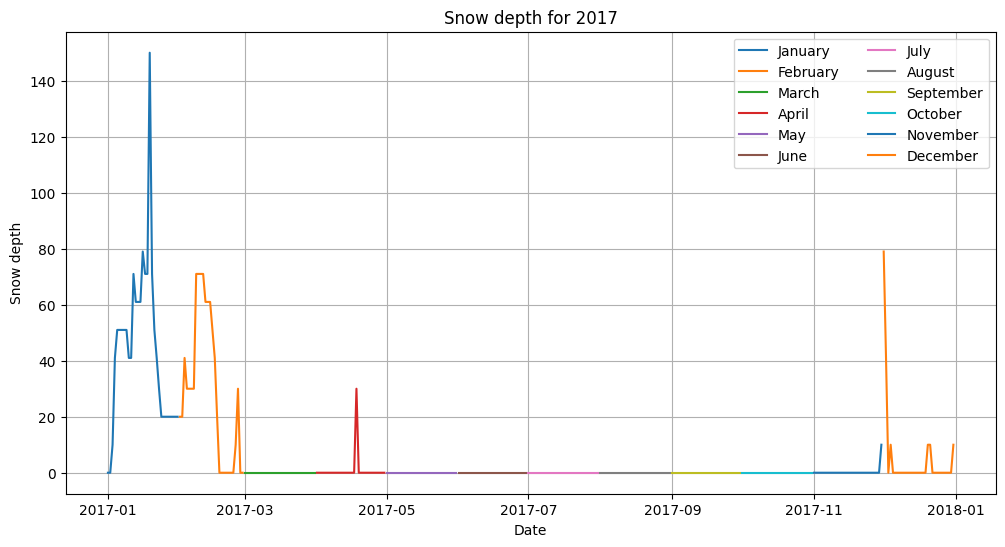

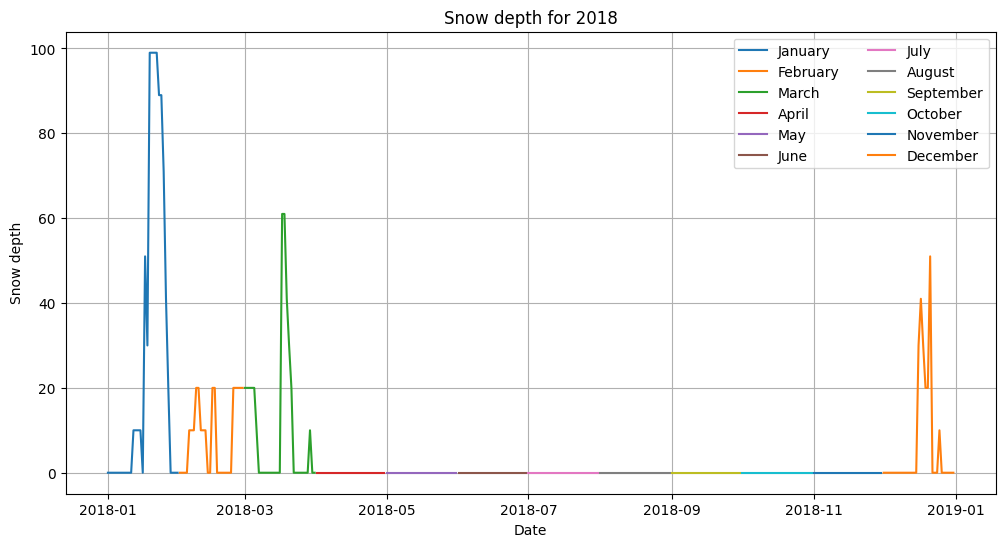

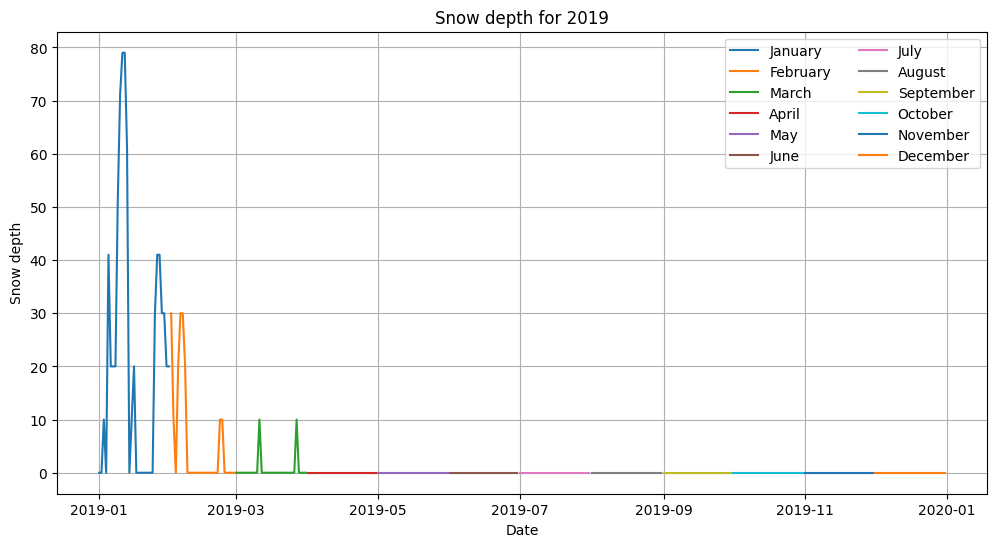

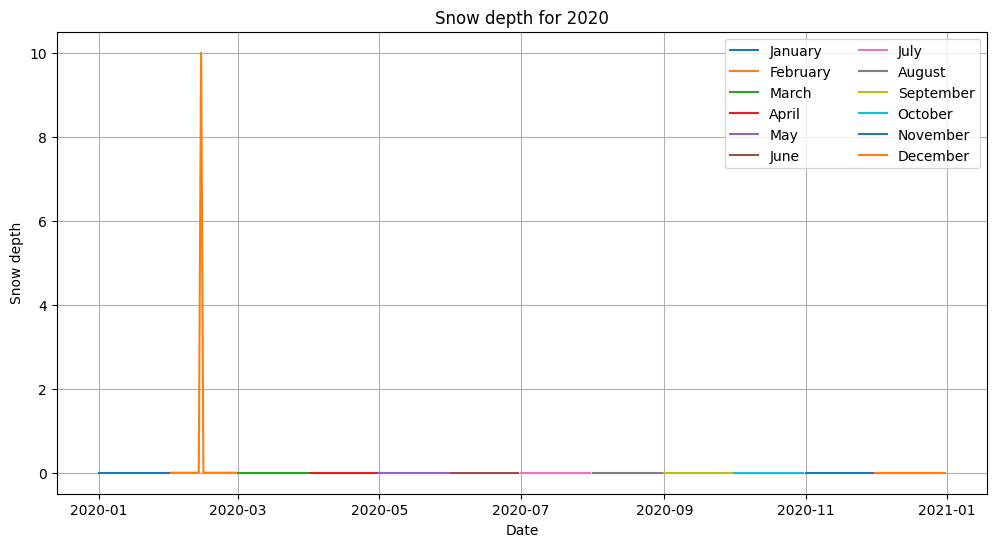

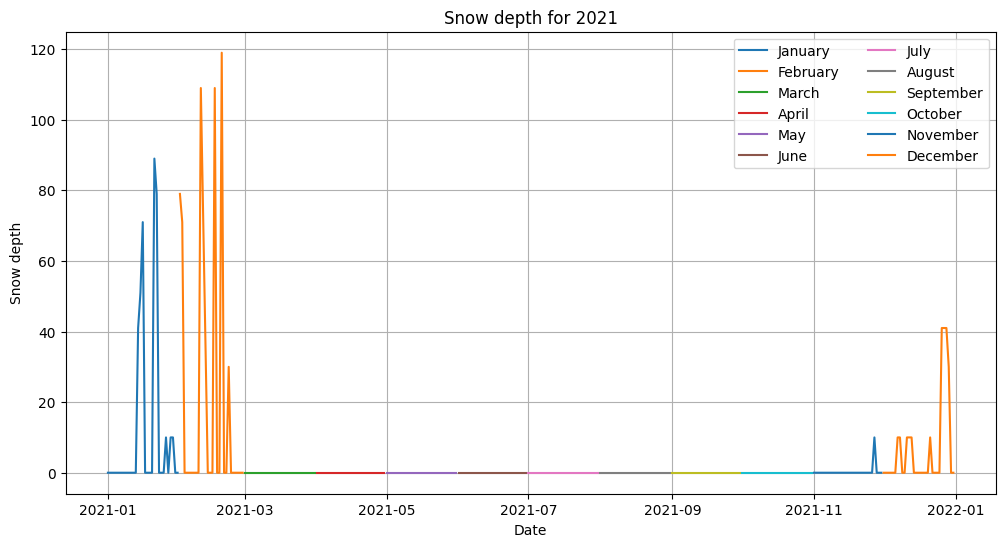

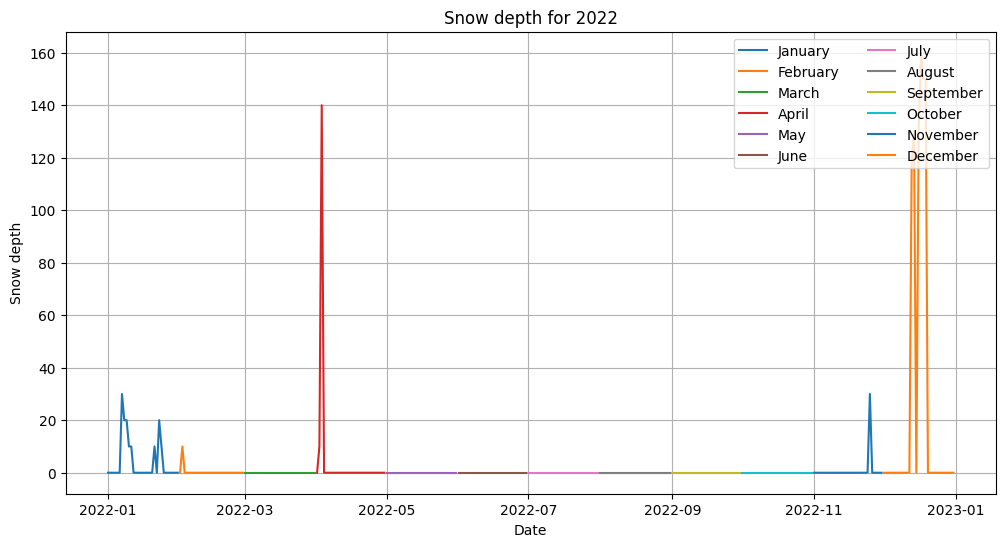

In [43]:
for year in years:
    plt.figure(figsize=(12,6))
    
    for month in months_names:
        month_data = globals()[f'{month}_data']
        month_year_data = month_data[month_data['YEAR'] == year]
        plt.plot(month_year_data['DATE'], month_year_data['SNWD'], label=month.capitalize())
        
    plt.title(f'Snow depth for {year}')
    plt.xlabel('Date')
    plt.ylabel('Snow depth')
    plt.legend(loc='upper right', ncol=2)
    plt.grid(True)
    plt.show()

### Visualisation - heatmap of average monthly temperatures, 1993-2023

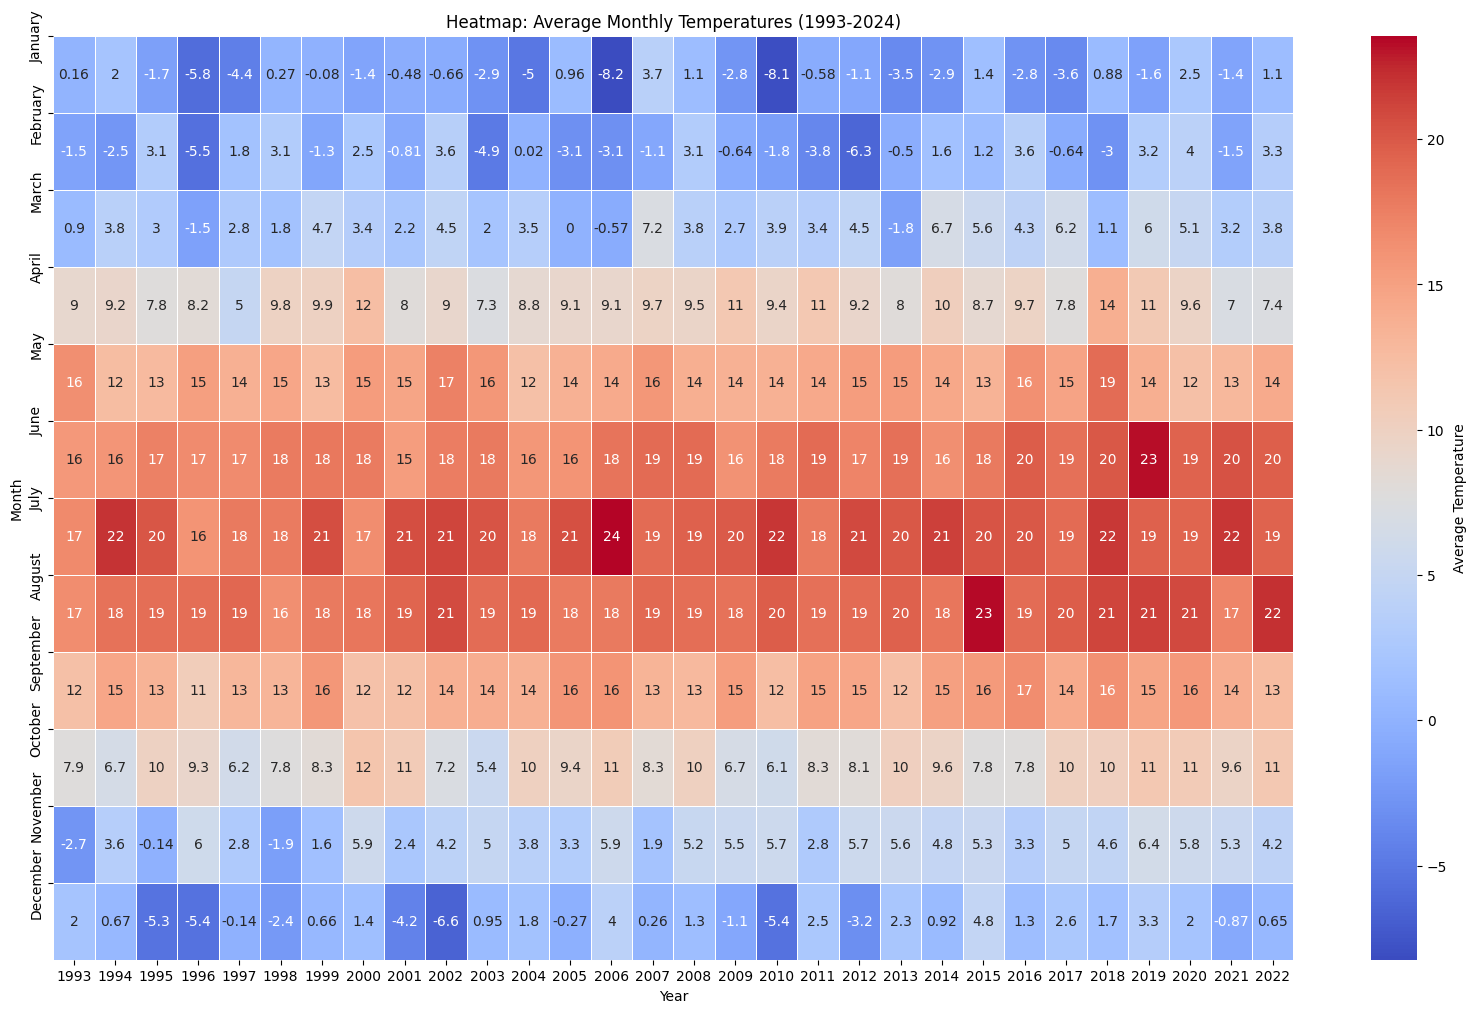

In [44]:
mavg_data = {}

for month in months_names:
    month_data = globals()[f'{month}_data']
    yearly_avg = month_data.groupby('YEAR')['MAVG'].mean()
    mavg_data[month] = yearly_avg

mavg = pd.DataFrame(mavg_data)

plt.figure(figsize=(20,12))
sns.heatmap(mavg.T, annot=True, cmap='coolwarm', linewidths=0.5, cbar_kws={'label': 'Average Temperature'})
plt.title('Heatmap: Average Monthly Temperatures (1993-2024)')
plt.xlabel('Year')
plt.ylabel('Month')
plt.yticks(ticks=range(12), labels=[month.capitalize() for month in months_names])
plt.show()

### Forecasting

In [69]:
def avg (numbers):
    return round(sum(numbers)/len(numbers),1)
    
def forecast_for_day (date):
    past_temperatures = past_property_for_date(date, "TAVG")
    past_precipitation = past_property_for_date(date, "PRCP")
    past_snow_depth = past_property_for_date(date, "SNWD")
    precipitation_probability = len(list(filter(lambda x: x > 0, past_precipitation)))/len(past_precipitation)
    return avg(past_temperatures), avg(past_precipitation), avg(past_snow_depth), round(precipitation_probability, 4)

def past_property_for_date (date, prop):
    target_day = date.day
    target_month = date.month
    return weather[weather["DATE"].apply(lambda x: x.day == target_day and x.month == target_month)][prop].tolist()

def get_desc_for_prcp (prcp):
    if prcp > 0.5:
        return "High chance of precipitation - better to stay inside today!"
    elif prcp > 0.2:
        return "Moderate chance of precipitation - take an umbrella with you!"
    return "Low chance of precipitation - enjoy your day!"

def get_desc_for_temp (temp):
    if temp > 19:
        return "Hot day ahead! Stay hydrated!"
    elif temp > 13:
        return "Comfortably warm weather"
    elif temp > 7:
        return "Mild weather today. A light jacket should do!"
    elif temp >= 0:
        return "Cool weather. A scarf and gloves might come in handy!"
    return "It's frosty outside. Dress in layers and stay cozy!"



temperature, precipitation, snow_depth, precipitation_probability = forecast_for_day(pd.Timestamp(year=2025, month=7, day=3))

print("Temperature:", temperature)
print(get_desc_for_temp(temperature))
print("Precipitation:", precipitation, "\nPrecipitation probability:", precipitation_probability*100, "%")
print(get_desc_for_prcp(precipitation_probability))
print("Snow depth:", snow_depth)






Temperature: 19.2
Hot day ahead! Stay hydrated!
Precipitation: 2.1 
Precipitation probability: 46.67 %
Moderate chance of precipitation - take an umbrella with you!
Snow depth: 0.0
